<font color=darkcyan>
<font size =5>
Problem Definition

<font color= black>
<font size =2.5>
    
 A bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

The bank needs to improve its services so that customers do not renounce their credit cards.

<font color=darkcyan>
<font size =5>
Objective

<font color=black>
<font size =2.5>
        
1. Explore and visualize the dataset to analyze customers who will leave their credit card services.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank retain credit card customers.
5. Provide business recommendations so that bank reduces losses.

<font color=darkcyan>
<font size =5>
1.1 Installing and Loading all required packages and libraries

In [1092]:
# Installing imblearn package
#!pip install imblearn

In [1093]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()


# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To build sklearn model

from sklearn import tree
import scipy.stats as stats

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Libraries to import different models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

#Libraries for oversample and undersample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries for regularization methods
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Libraries for k-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To use statistical functions
import scipy.stats as stats

<font color=darkcyan>
<font size =5>
1.2 Importing the Data Set

In [1094]:
#Import the Loan Modelling data set
data = pd.read_csv("BankChurners.csv")

In [1095]:
# copying data to another variable to avoid any changes to original data
churn = data.copy()

<font color=darkcyan>
<font size =5>
1.3 Structural Overview of the Data Set

<font color=darkorange>
<font size =4.5>
1.3.1 Viewing the first 10 and last 10 rows of the Data Set

In [1096]:
churn.head(10)# Read top 10 values of the data set

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6             NaN        Married         $120K +          Gold   
7     High School            NaN     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   
5              36                         3                       1   
6              46                         6                       1   
7              27                         2                       2   
8              36                         5                       2   
9              36                         6                       3   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   
5                      2        4010.0                 1247           2763.0   
6                      3       34516.0                 2264          32252.0   
7                      2       29081.0                 1396          27685.0   
8                      0       22352.0                 2517          19835.0   
9                      3       11656.0                 1677           9979.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   

In [1097]:
churn.tail(10)# Read bottom 10 values of the data set

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10117  712503408  Existing Customer            57      M                2   
10118  713755458  Attrited Customer            50      M                1   
10119  716893683  Attrited Customer            55      F                3   
10120  710841183  Existing Customer            54      M                1   
10121  713899383  Existing Customer            56      F                1   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10117        Graduate        Married    $80K - $120K          Blue   
10118             NaN            NaN    $80K - $120K          Blue   
10119      Uneducated         Single             abc          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10117              40                         6                       3   
10118              36                         6                       3   
10119              47                         4                       3   
10120              34                         5                       2   
10121              50                         4                       1   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10117                      4       17925.0                 1909   
10118                      4        9959.0                  952   
10119                      3       14657.0                 2517   
10120                      0       13940.0                 2109   
10121                      4        3688.0                  606   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10117          16016.0                 0.712            17498             111   
10118           9007.0                 0.825            10310              63   
10119          12140.0                 0.166             6009              53   
10120          11831.0                 0.660            15577             114   
10121           3082.0                 0.570            14596             120   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126         

<font color = 'green'>
<font size =1 >
# Observations : 
The dataset looks clean and consistent with the description provided.

<font color=darkorange>
<font size =4.5>
1.3.2 Data columns of the given Loan Modelling Data Set

In [1098]:
churn.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<font color = 'green'>
<font size =1 >
# Observations : 
The dataset consists of the above 21 columns.

<font color=darkorange>
<font size =4.5>
1.3.3 Checking the data shape

In [1099]:
churn.shape #shape of dataset

(10127, 21)

<font color = 'green'>
<font size =1 >
# Observations : 
We have 10127 rows and 21 columns

<font color=darkorange>
<font size =4.5>
1.3.4 Checking the detailed information of the columns like data type, count, etc.

In [1100]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. CLIENTNUM column looks like a unique customer id. We can check for any repeating customer data in it if none are repeating and its a unique value then that column can be dropped.
2. Attrition Flag is our target variable for this model, its an object category
3. All these columns have numerical values , integer or float : Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio. 

<font color=darkorange>
<font size =4.5>
1.3.5 Checking for null values in the entire data set

In [1101]:
churn.isnull().values.any() # If there are any null values in data set

True

In [1102]:
# Check for null values in the data each column
churn.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
Avg_Utilization_Ratio          0
Months_on_book                 0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Income_Category                0
Card_Category                  0
Total_Relationship_Count       0
Total_Ct_Chng_Q4_Q1            0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
CLIENTNUM                      0
dtype: int64

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

 Education level and maritial status have missing values and need further evaluation and appropriate missing value treatment before model building.

<font color=darkorange>
<font size =4.5>
1.3.6 Summary of the Data Set

In [1103]:
# Detailed summary of the data set
churn.describe(include="all")


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
count   1.012700e+04              10127  10127.000000  10127     10127.000000   
unique           NaN                  2           NaN      2              NaN   
top              NaN  Existing Customer           NaN      F              NaN   
freq             NaN               8500           NaN   5358              NaN   
mean    7.391776e+08                NaN     46.325960    NaN         2.346203   
std     3.690378e+07                NaN      8.016814    NaN         1.298908   
min     7.080821e+08                NaN     26.000000    NaN         0.000000   
25%     7.130368e+08                NaN     41.000000    NaN         1.000000   
50%     7.179264e+08                NaN     46.000000    NaN         2.000000   
75%     7.731435e+08                NaN     52.000000    NaN         3.000000   
max     8.283431e+08                NaN     73.000000    NaN         5.000000   

       Education_Level Marital_Status Income_Category Card_Category  \
count             8608           9378           10127         10127   
unique               6              3               6             4   
top           Graduate        Married  Less than $40K          Blue   
freq              3128           4687            3561          9436   
mean               NaN            NaN             NaN           NaN   
std                NaN            NaN             NaN           NaN   
min                NaN            NaN             NaN           NaN   
25%                NaN            NaN             NaN           NaN   
50%                NaN            NaN             NaN           NaN   
75%                NaN            NaN             NaN           NaN   
max                NaN            NaN             NaN           NaN   

        Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count     10127.000000              10127.000000            10127.000000   
unique             NaN                       NaN                     NaN   
top                NaN                       NaN                     NaN   
freq               NaN                       NaN                     NaN   
mean         35.928409                  3.812580                2.341167   
std           7.986416                  1.554408                1.010622   
min          13.000000                  1.000000                0.000000   
25%          31.000000                  3.000000                2.000000   
50%          36.000000                  4.000000                2.000000   
75%          40.000000                  5.000000                3.000000   
max          56.000000                  6.000000                6.000000   

        Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            10127.000000  10127.000000         10127.000000   
unique                    NaN           NaN                  NaN   
top                       NaN           NaN                  NaN   
freq                      NaN           NaN                  NaN   
mean                 2.455317   8631.953698          1162.814061   
std                  1.106225   9088.776650           814.987335   
min                  0.000000   1438.300000             0.000000   
25%                  2.000000   2555.000000           359.000000   
50%                  2.000000   4549.000000          1276.000000   
75%                  3.000000  11067.500000          1784.000000   
max                  6.000000  34516.000000          2517.000000   

        Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
count      10127.000000          10127.000000     10127.000000   
unique              NaN                   NaN              NaN   
top                 NaN                   NaN              NaN   
freq                NaN                   NaN              NaN   
mean        7469.139637              0.759941      4404.086304   
std         9090.685324              0.219207      3397.129

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Data in following columns is `skewed` and needs further evaluation and checking for `outliers`:
  Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, Total_Trans_Ct, Avg_Utilization_Ratio. 
2. Most of the data is for `Existing Customers`. 
3. Most customers are `female`.
4. Most customers have a `Graduate` education level, are `married` and earning `less than $ 40K`.
5. Most customers card category is `Blue`.

<font color=darkcyan>
<font size =5>
1.4 Fixing The Data Types

<font color=darkorange>
<font size =4.5>
1.4.1 Changing bool and object to categorical type

In [1104]:

## Converting the data type of categorical features to 'category'
cat_cols = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' ]
churn[cat_cols] = churn[cat_cols].astype('category')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

<font color = 'green'>
<font size =1 >
# Observations : 
All bool and object coulmns have been converted to category columns

<font color=darkorange>
<font size =4.5>
1.4.2 Removing redundant column "CLIENTNUM"

In [1105]:
#Check if CLIENTNUM column has any repeating values
churn['CLIENTNUM'].value_counts()

780097533    1
720049083    1
717376758    1
720598308    1
719930658    1
            ..
818987958    1
808753758    1
789347133    1
806189658    1
713594883    1
Name: CLIENTNUM, Length: 10127, dtype: int64

<font color = 'green'>
<font size =1 >
# Observations : 
There are 10127 unique Client num values . Hence no repeating customers. Therefore this column is redundant and can be dropped from our further evaluation.

In [1106]:
# Drop CLIENTNUM column
churn.drop(["CLIENTNUM"], axis=1, inplace=True)
churn.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

<font color = 'green'>
<font size =1 >
# Observations : 
Client num column is dropped. Now we have 20 columns to evaluate.

<font color=darkorange>
<font size =4.5>
1.4.3 Checking Unique value in each column

In [1107]:
# Unique category in each coulmn
for i in churn.columns:
    print(churn[i].value_counts())
    print("*" * 50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64
**************************************************
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
**************************************************
Graduate         3128
High School      2013
Uneducated       1487
College          

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Our target variable `Attrition Flag` is looking like an `imbalanced` data. As most of the customers are `Existing Customer` while there are are very few `Attrited customer` data.
2.`Customer Age` varies from `26 to 73 years`, with maximum customers in age group of 40-50 years.
3. `Dependent count` varies from `0 to 5`. Most customers have 2 or 3 dependents.
4. `Education level` has 6 unique values namely, `Graduate`, `High School`, `Uneducated`, `College`, `Post-Graduate`, `Doctorate`. And some missing values that can be categorized as unkown for now. Most customers have a education level of Graduate or a high school.
5. `Marital Status` has 3 unique values `Married`, `Single`, `Divorced`. Max customers are married.
6. `Income level` of customers is categorized as `Less than $40K`, `$40K - $60K` , `$60K - $80K`, `$80K - $120K`, `$120K+`. There is odd category called 'abc' , assumming it as unkown or not specified by customer.
7. `Card categories` are `Blue`, `Silver`, `Gold`, `Platinum`. But 'Blue' seems to be the most popular of categories with most customers having Blue card.
8. Period of customer relation ship with bank varies from 13 to 56 months. most customers are with bank for 36 months, i.e. 3 years.
9. Total number of products held by customer varies from 1 to 6. Most customers have 3 products.
10. Number of contacts between customer and bank varies from 0 to 6 times. Mostly its 2 or 3 times.
11. Credit Limit on card too varied and varies from 1438 to 34516.
12. Total transaction count is from 0 to 139 times.
13. Average Utilization varies from 0 to 0.99.


In [1108]:
#Summary of categorical columns
churn.describe(include=['category']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Most customer data is for existing customers, they are mostly Female, have a graduate degree, are married and earning less than $40k. 
2. Mostly customers have Blue card.
3. Education level and Marital Status have missing values.


In [1109]:
#Summary of numerical columns
churn.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Data in following columns is `skewed` and needs further evaluation and checking for `outliers`:
  Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, Total_Trans_Ct, Avg_Utilization_Ratio.
2. Avg_Open_To_Buy column has a too varied min and max, should be checked for outliers.

<font color=darkorange>
<font size =4.5>
1.4.4 Converting  'abc' value to 'Unkown' in Income Category column.

In [1110]:
# Replacing Fe Male with Female as it looks like a typing error in data
churn["Income_Category"].replace({"abc": "Unkown"}, inplace=True)
churn["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unkown            1112
$120K +            727
Name: Income_Category, dtype: int64

<font color=darkcyan>
<font size =5>
1.5 Univariate Analysis

<font color=darkorange>
<font size =4.5>
1.5.1 Histogram of all the given columns

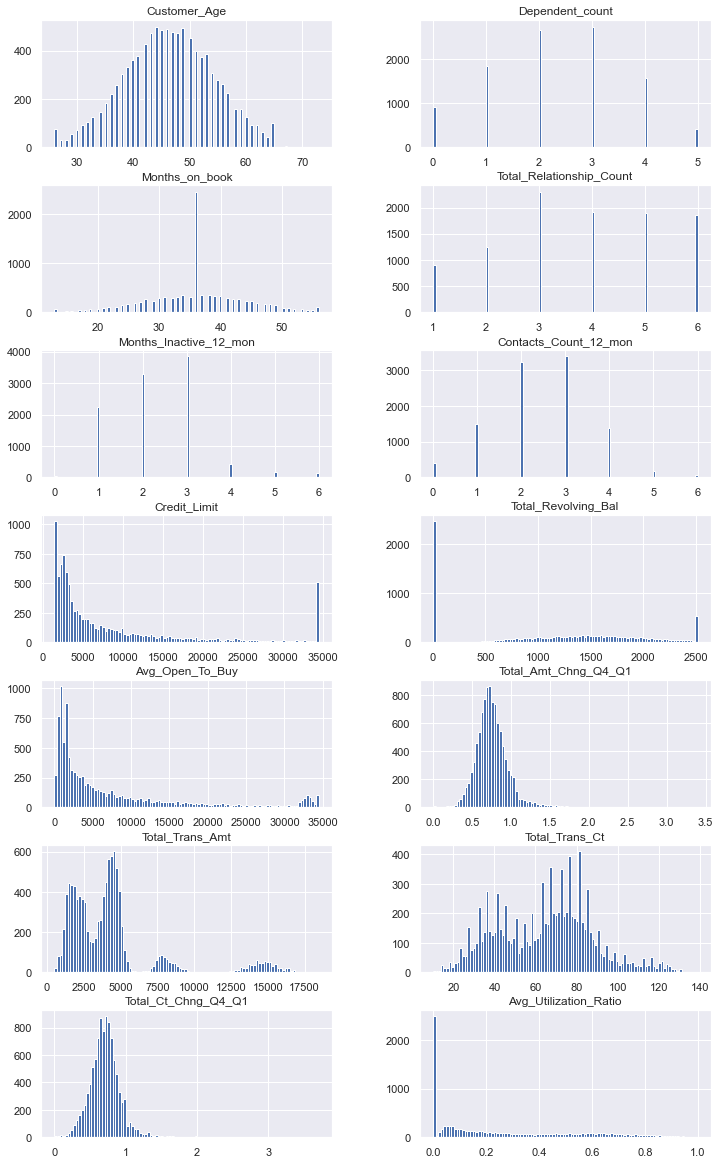

In [1111]:
# Plotting a histogram of all numerical columns in the dataset
columns = list(churn)# All columns in the data set
churn[columns].hist(stacked=False, bins=100, figsize=(12,60), layout=(20,2)); # plot histogram


<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>
<font size =1 >

1. Customer Age apppears equally distributed from less than to more than 60, with 40-50 being the age group with maximum customers.
2. Most customers have 2-3 dependents. 
3. most customer have 36 month period with bank , needs further analysis for the reason for the same. 
4. Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Total_Amt_Chng_Q4_Q1 graphs appear right skewed. need further evaluation.
5. Max customers have Total_Revolving_Bal as zero, followed by 2500.
6. Most customers have 3 or more products from the bank
7. Number of months inactive in last 12 months for most customers its between 1-3 months.
8. Number of contacts between bank and customer in a year is mostly 2 to 3 times.
9. For maximum customers Avg_Utilization_Ratio is zero.

<font color=darkorange>
<font size =4.5>
1.5.2 Univariate analysis of numerical variables to study their central tendency and dispersion.

In [1112]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
#  Writing a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="cyan"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.countplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        feature, kde=False, ax=ax_hist2,palette="winter"
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<font color=darkorange>
<font size =4.5>
1.5.2.1 Boxplot and Histogram of Customer_Age

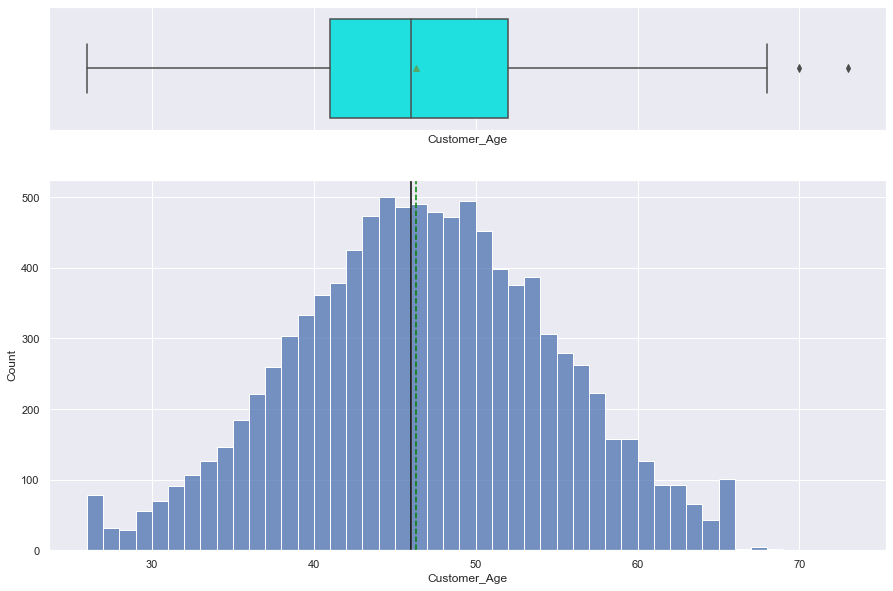

In [1113]:
# Plotting Customer Age
histogram_boxplot(churn['Customer_Age'])

<font color=green>
<font size =1>
# Observations : 
    1) Age roughly varies from 20 to 70.
    2) Age group of 45 to 55 appears to have maximum customers.
    3) No skew.
    4) Couple of outliers.

<font color=darkorange>
<font size =4.5>
1.5.2.2 Boxplot and Histogram of Period of relationship of customer with bank.

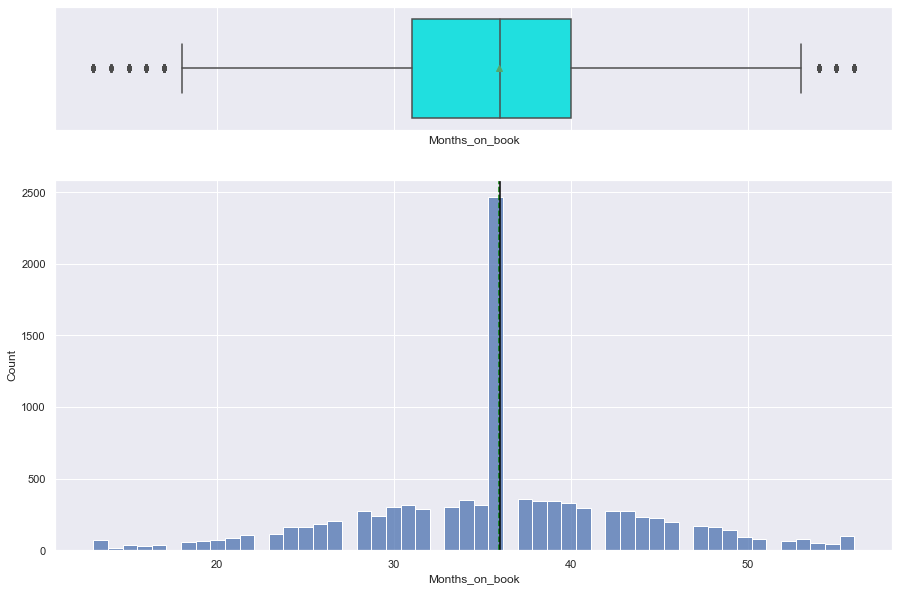

In [1114]:
# Plotting Months_on_book
histogram_boxplot(churn["Months_on_book"])

<font color=green>
<font size =1>
# Observations : 
    1) Extremely high value of customers have a relationship of 36 months with the bank.
    2) No skew
    3) Few outliers

<font color=darkorange>
<font size =4.5>
1.5.2.3 Boxplot and Histogram of Credit_Limit

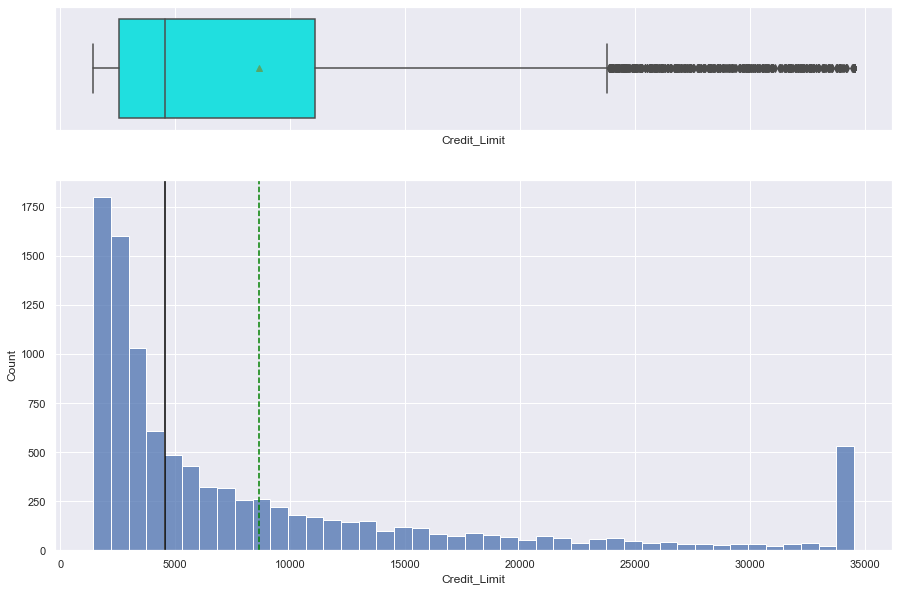

In [1115]:
histogram_boxplot(churn["Credit_Limit"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Mostly Right Skewed .
    2) Max customers have a credit limit of 0-5000.
    3) Followed by a  high credit limit 35000.

<font color=darkorange>
<font size =4.5>
1.5.2.4 Boxplot and Histogram of Total_Revolving_Bal

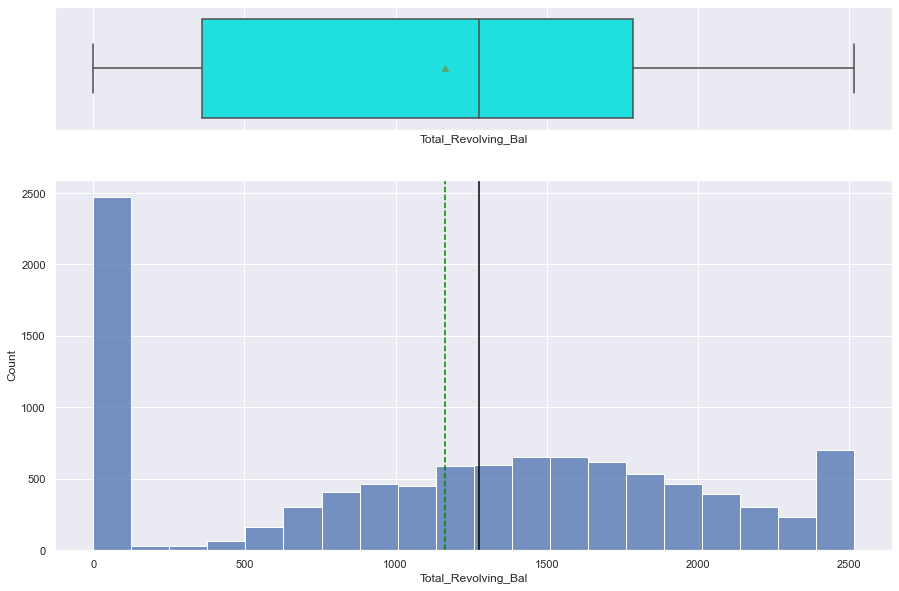

In [1116]:
histogram_boxplot(churn["Total_Revolving_Bal"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Most customers have zero revolving balance. That is most customers pay of their bills every month.
    2) No skew, no outliers.
    3) 2500 is the maximum revolving balance of a customer with the bank.

<font color=darkorange>
<font size =4.5>
1.5.2.5 Boxplot and Histogram of Avg_Open_To_Buy

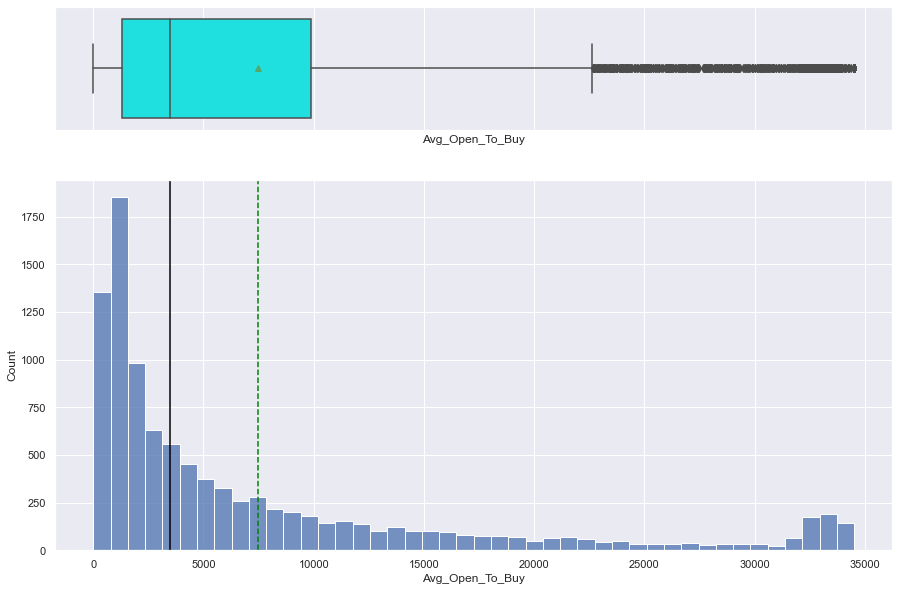

In [1117]:
histogram_boxplot(churn["Avg_Open_To_Buy"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Mostly Right Skewed .
    2) Few outliers are present

<font color=darkorange>
<font size =4.5>
1.5.2.6 Boxplot and Histogram of Total_Amt_Chng_Q4_Q1

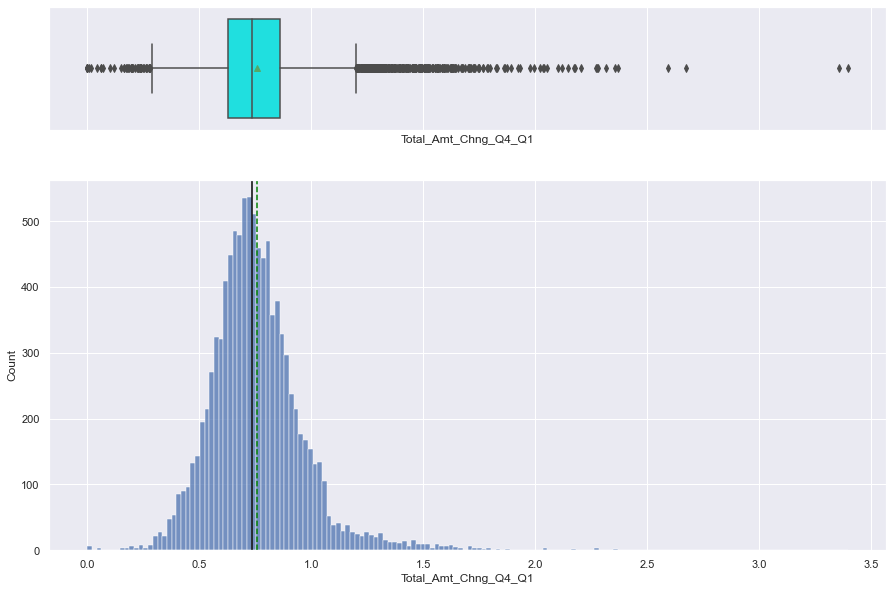

In [1118]:
histogram_boxplot(churn["Total_Amt_Chng_Q4_Q1"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Mostly Right Skewed .
    2) Few outliers are present
    3) Maximum Total_Amt_Chng_Q4_Q1 is between 0.5 to 1

<font color=darkorange>
<font size =4.5>
1.5.2.7 Boxplot and Histogram of Total_Trans_Amt

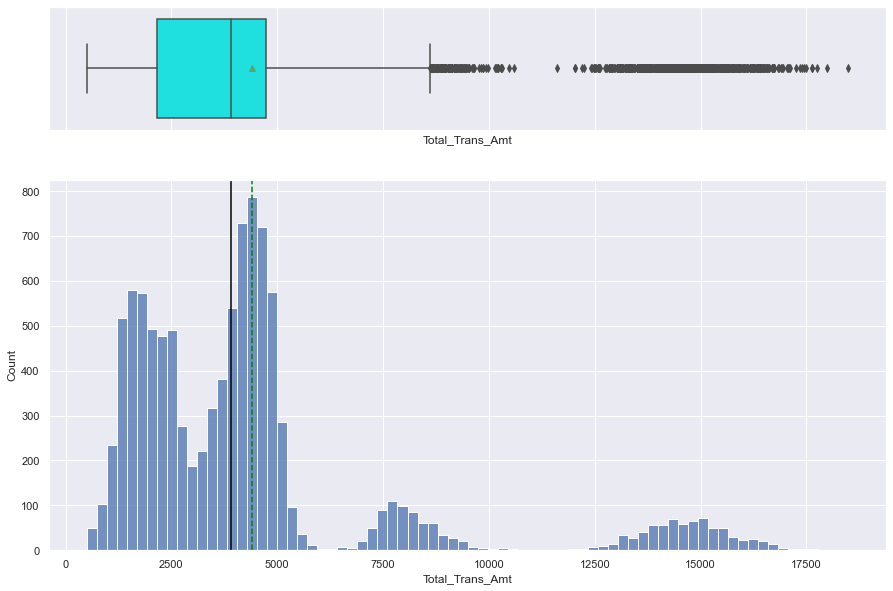

In [1119]:
histogram_boxplot(churn["Total_Trans_Amt"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Mostly Right Skewed .
    2) Multiple peaks. Need Bivariate analysis with type of card for further evaluation.
    3) Maximum Total_Trans_Amt is between 3000 to 5000

<font color=darkorange>
<font size =4.5>
1.5.2.8 Boxplot and Histogram of Total_Trans_Ct

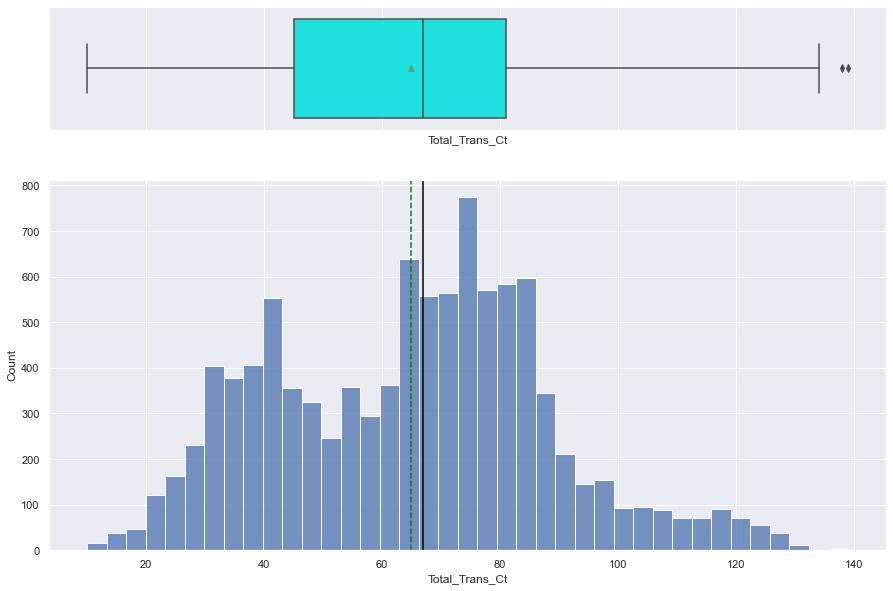

In [1120]:
histogram_boxplot(churn["Total_Trans_Ct"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) No skew.
    2) Very few outliers.
    3) Mostly transaction count is between 60- 90

<font color=darkorange>
<font size =4.5>
1.5.2.9 Boxplot and Histogram of Total_Ct_Chng_Q4_Q1

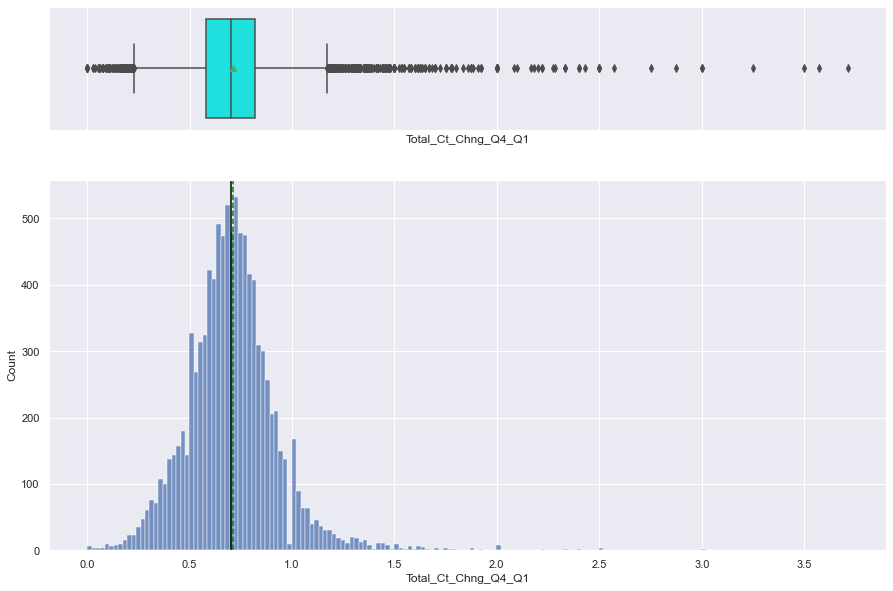

In [1121]:
histogram_boxplot(churn["Total_Ct_Chng_Q4_Q1"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Mostly Right Skewed .
    2) Few outliers are present
    3) Mostly Total_Ct_Chng_Q4_Q1 is between 0.5 to 1

<font color=darkorange>
<font size =4.5>
1.5.2.10 Boxplot and Histogram of Avg_Utilization_Ratio

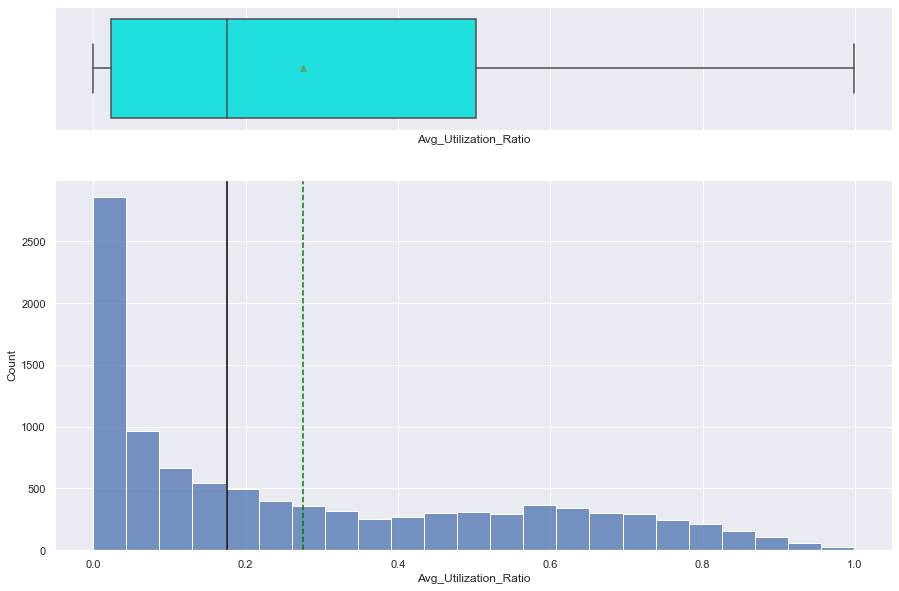

In [1122]:
histogram_boxplot(churn["Avg_Utilization_Ratio"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) No skew. No outliers
    2) Mostly zero Avg_utilization ratio.

<font color=darkorange>
<font size =4.5>
1.5.3 Percentage analysis of each category.

In [1123]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<font color=darkorange>
<font size =4.5>
1.5.3.1 Percentage by Dependent_count

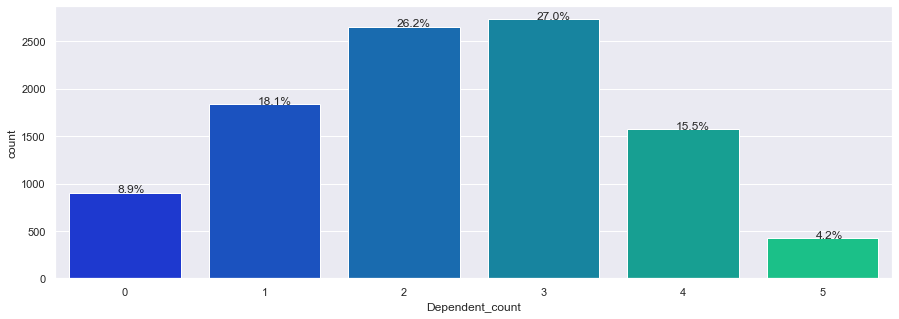

In [1124]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Dependent_count"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Dependent_count"])

<font color=green>
<font size = 1>
# Observations : 
 More than 50 % of customers have 2 or 3 dependents.


<font color=darkorange>
<font size =4.5>
1.5.3.2 Percentage by Gender

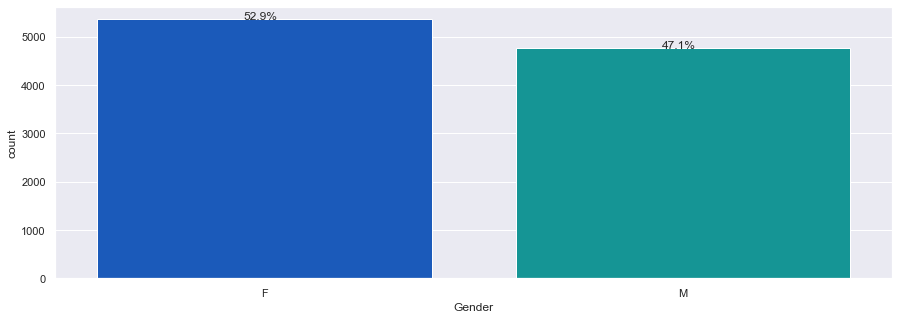

In [1125]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Gender"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Gender"])

<font color=green>
<font size = 1>
# Observations : 
52% of customers are female, where as only 47 % are male.

<font color=darkorange>
<font size =4.5>
1.5.3.3 Percentage by Education_Level

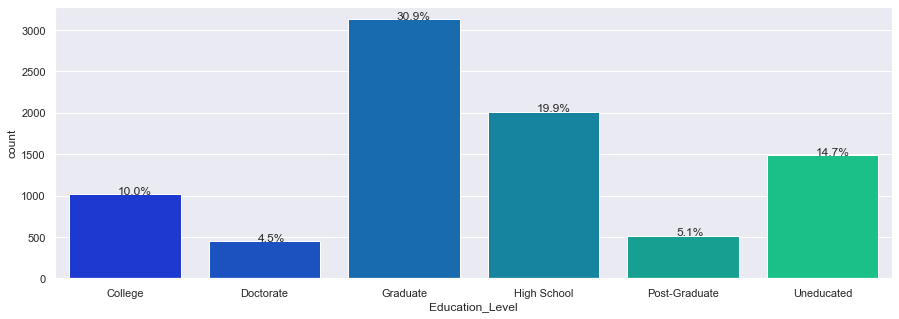

In [1126]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Education_Level"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Education_Level"])

<font color=green>
<font size = 1>
# Observations : 
Almost 50 % of customers fall in the graduate and high school category. 


<font color=darkorange>
<font size =4.5>
1.5.3.4 Percentage by Marital_Status

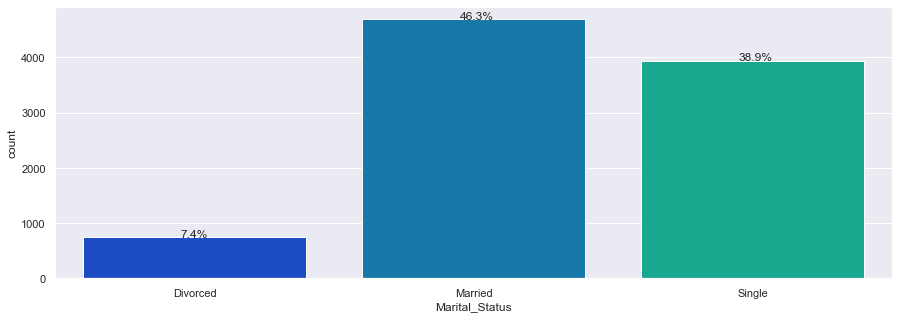

In [1127]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Marital_Status"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Marital_Status"])

<font color=green>
<font size = 1>
# Observations : 
Most customers are married and single, only 7 % customer data on divorced customers.


<font color=darkorange>
<font size =4.5>
1.5.3.5 Percentage by Income_Category

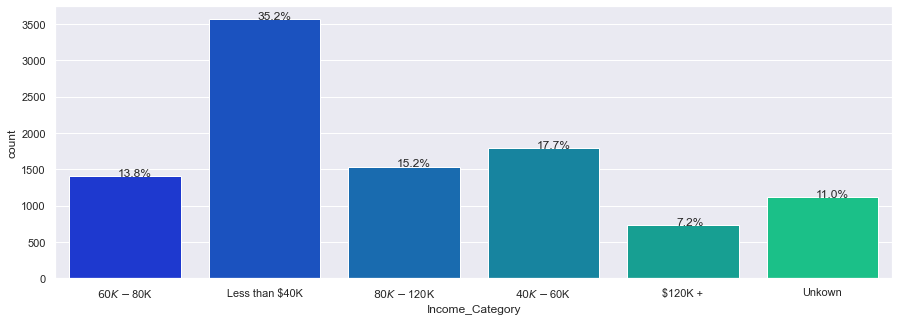

In [1128]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Income_Category"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Income_Category"])

<font color=green>
<font size = 1>
# Observations :
35 % of customers fall in the less than $40k category. 11% of customers have not disclosed their income.


<font color=darkorange>
<font size =4.5>
1.5.3.6 Percentage by Card_Category

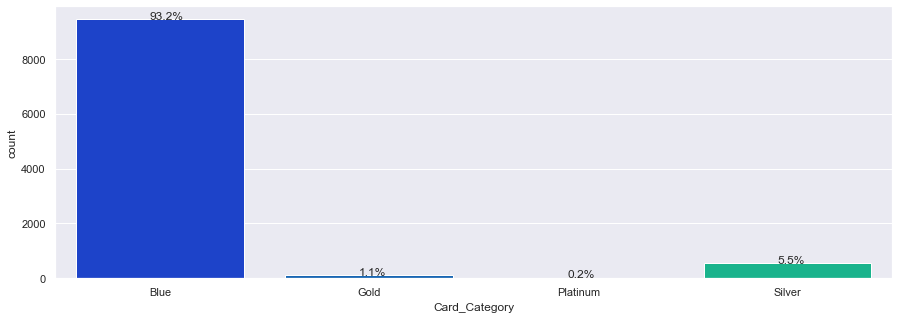

In [1129]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Card_Category"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Card_Category"])

<font color=green>
<font size = 1>
# Observations :
More than 90% of customers have blue card category. Assuming its the most popular card as it has most customer benefits.


<font color=darkorange>
<font size =4.5>
1.5.3.7 Percentage by Total_Relationship_Count

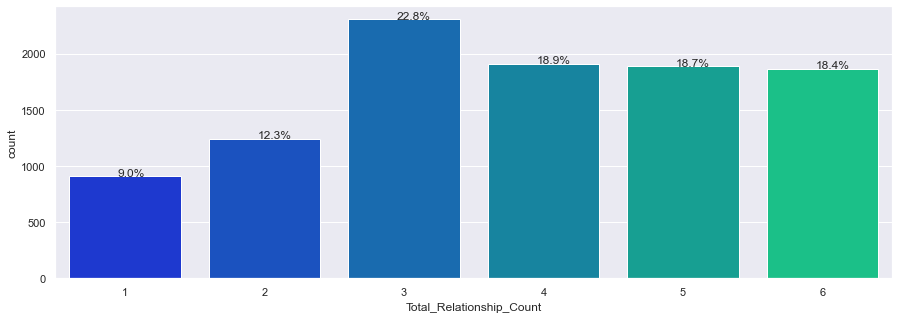

In [1130]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Total_Relationship_Count"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Total_Relationship_Count"])

<font color=green>
<font size = 1>
# Observations :
More than 75% of customers have more than 3 products. 


<font color=darkorange>
<font size =4.5>
1.5.3.8 Percentage by Months_Inactive_12_mon.

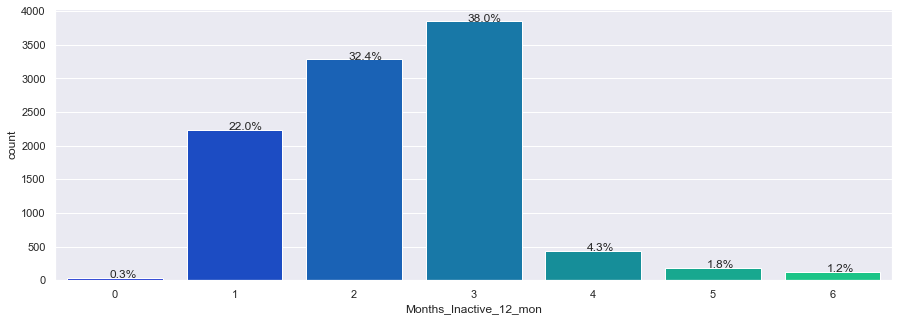

In [1131]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Months_Inactive_12_mon"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Months_Inactive_12_mon"])

<font color=green>
<font size = 1>
# Observations :
More than 80% of customers are inactive for 3 or less months only.


<font color=darkorange>
<font size =4.5>
1.5.3.9 Percentage by Contacts_Count_12_mon

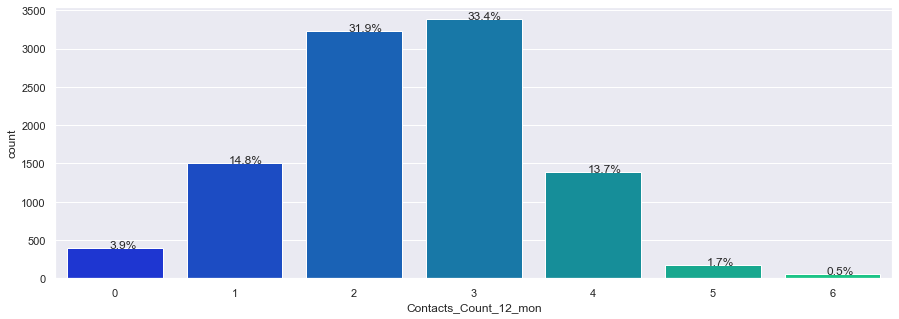

In [1132]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn["Contacts_Count_12_mon"],
    palette="winter",
    
)
perc_on_bar(ax, churn["Contacts_Count_12_mon"])

<font color=green>
<font size = 1>
# Observations :
Almost 60 % of customers have atleast 2-3 contacts in the last 12 months with the bank.


<font color=darkcyan>
<font size =5>
1.6 Bivariate Analysis

In [1133]:
churn_bi = churn.copy()

<font color=darkorange>
<font size =4.5>
1.6.1 Pair plots of all numerical data

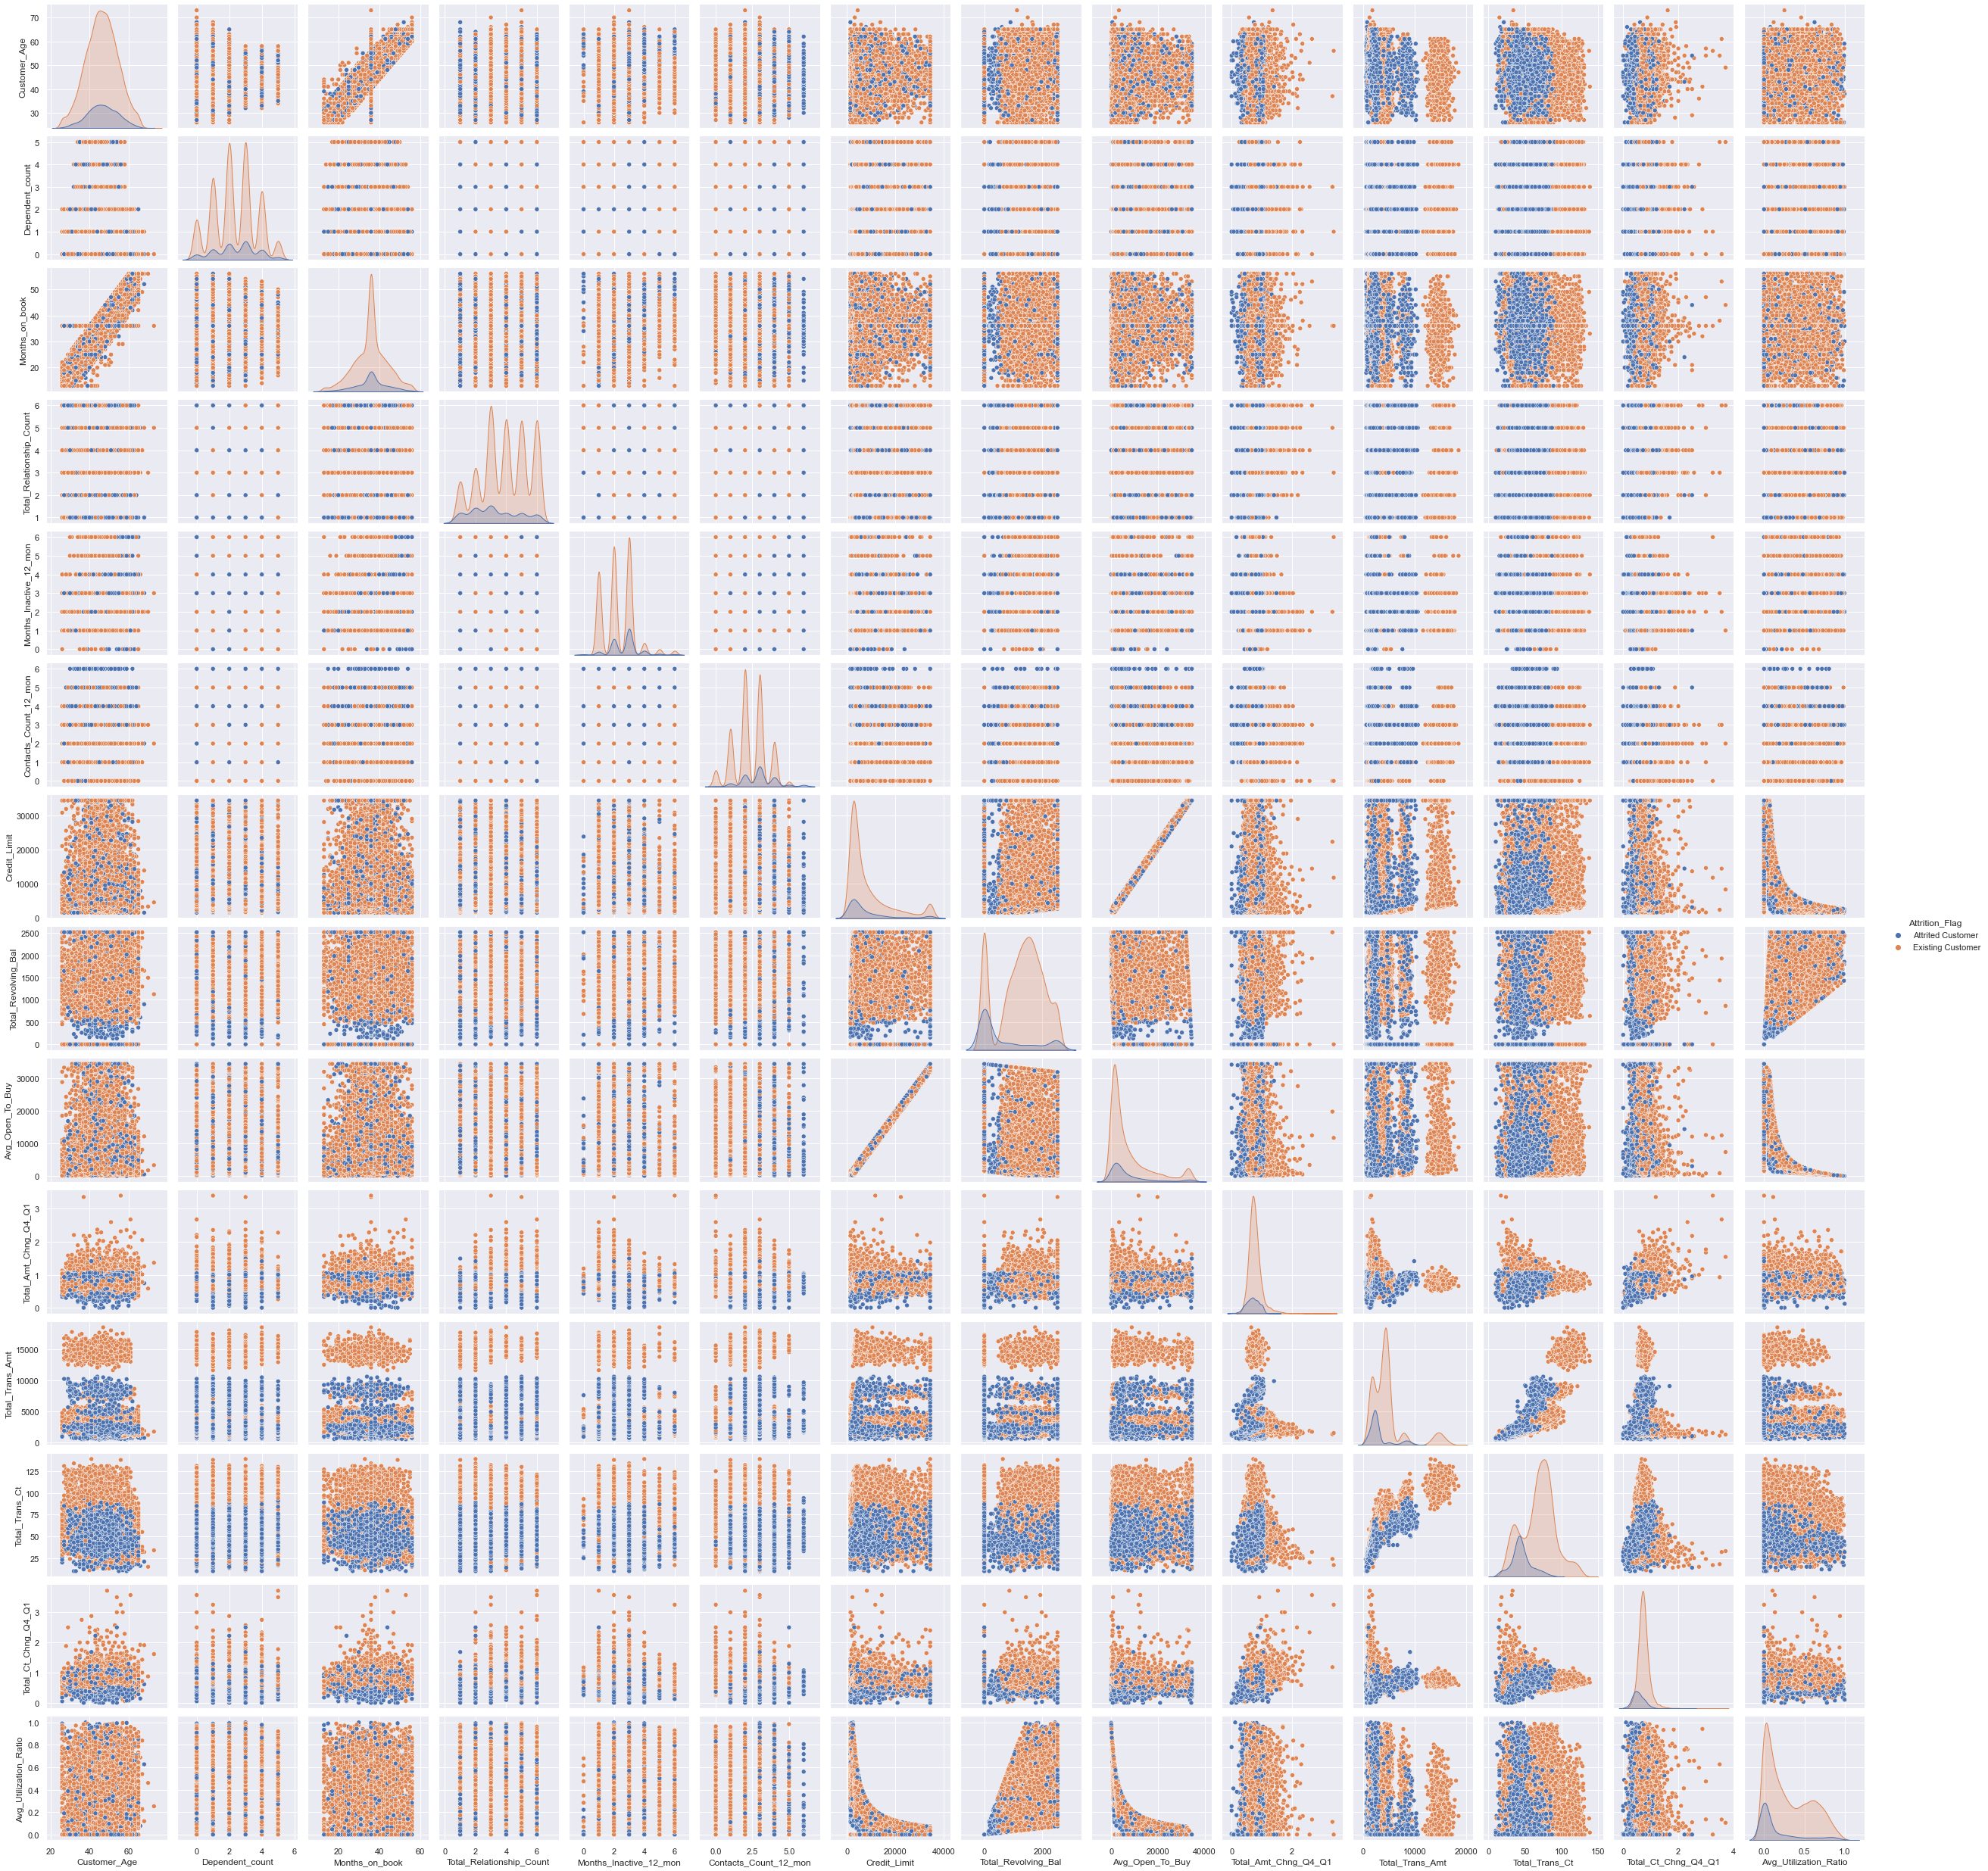

In [1134]:
# Plotting pair plots between all numerical columns
sns.pairplot(data= churn_bi, diag_kind="kde", hue = 'Attrition_Flag')
plt.show()

<font color=green>
<font size =1>
# Observations 


   <font color = 'green'>
    
1. In diagonal distribution plot there is no strong distinction between Attrited and Existing customers.
2. Customer Age and Months_on_book show a strong correlation
3. Avg_Open_To_Buy and Credit_Limit are strongly correlatated. When columns are so strongly correlated we can choose to combine them and form a composite. 
4. Avg_Open_To_Buy and Credit_Limit reduces as Avg_Utilization_Ratio increases.
5. Mostly all customers with hihger values of Total_Trans_Amtand Total_Trans_Ct  are existing customers.
6. Total_Revolving_Bal and Avg_Utilization_Ratio higher the values more existing customers.
    


<font color=darkorange>
<font size =4.5>
1.6.2 Plotting a heat map

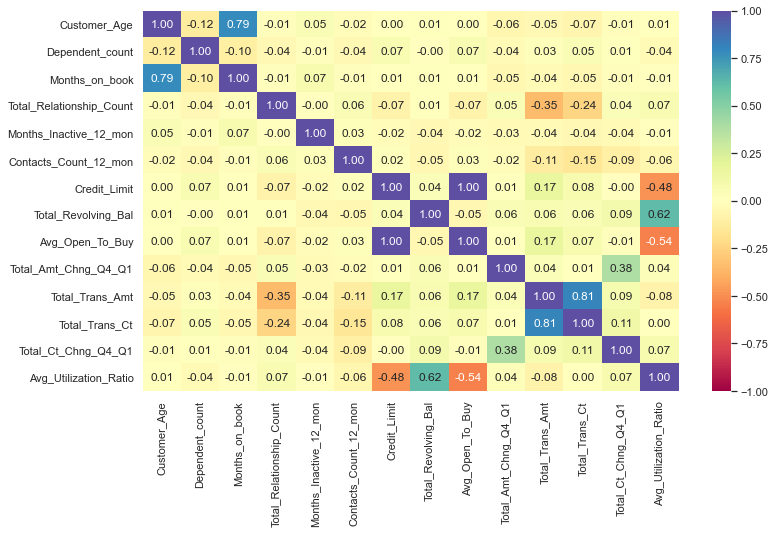

In [1135]:
# Plotting a heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    churn_bi.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. There is a considerable correlation between months on book and customer age.
2. Very high correlation between Total_Trans_Amt and Total_Trans_Ct
3. Avg_Utilization_Ratio and Total_Revolving_Bal also have a high correlation.
4. Avg_Utilization_Ratio and Credit_Limit have a high negative correlation.
5. Avg_Utilization_Ratio and Avg_Open_To_Buy also have a high negative correlation.

<font color=darkorange>
<font size =4.5>
1.6.3 Plotting a Bar Plot Correlation between Customer Attrition  and all other Dependent paparameters

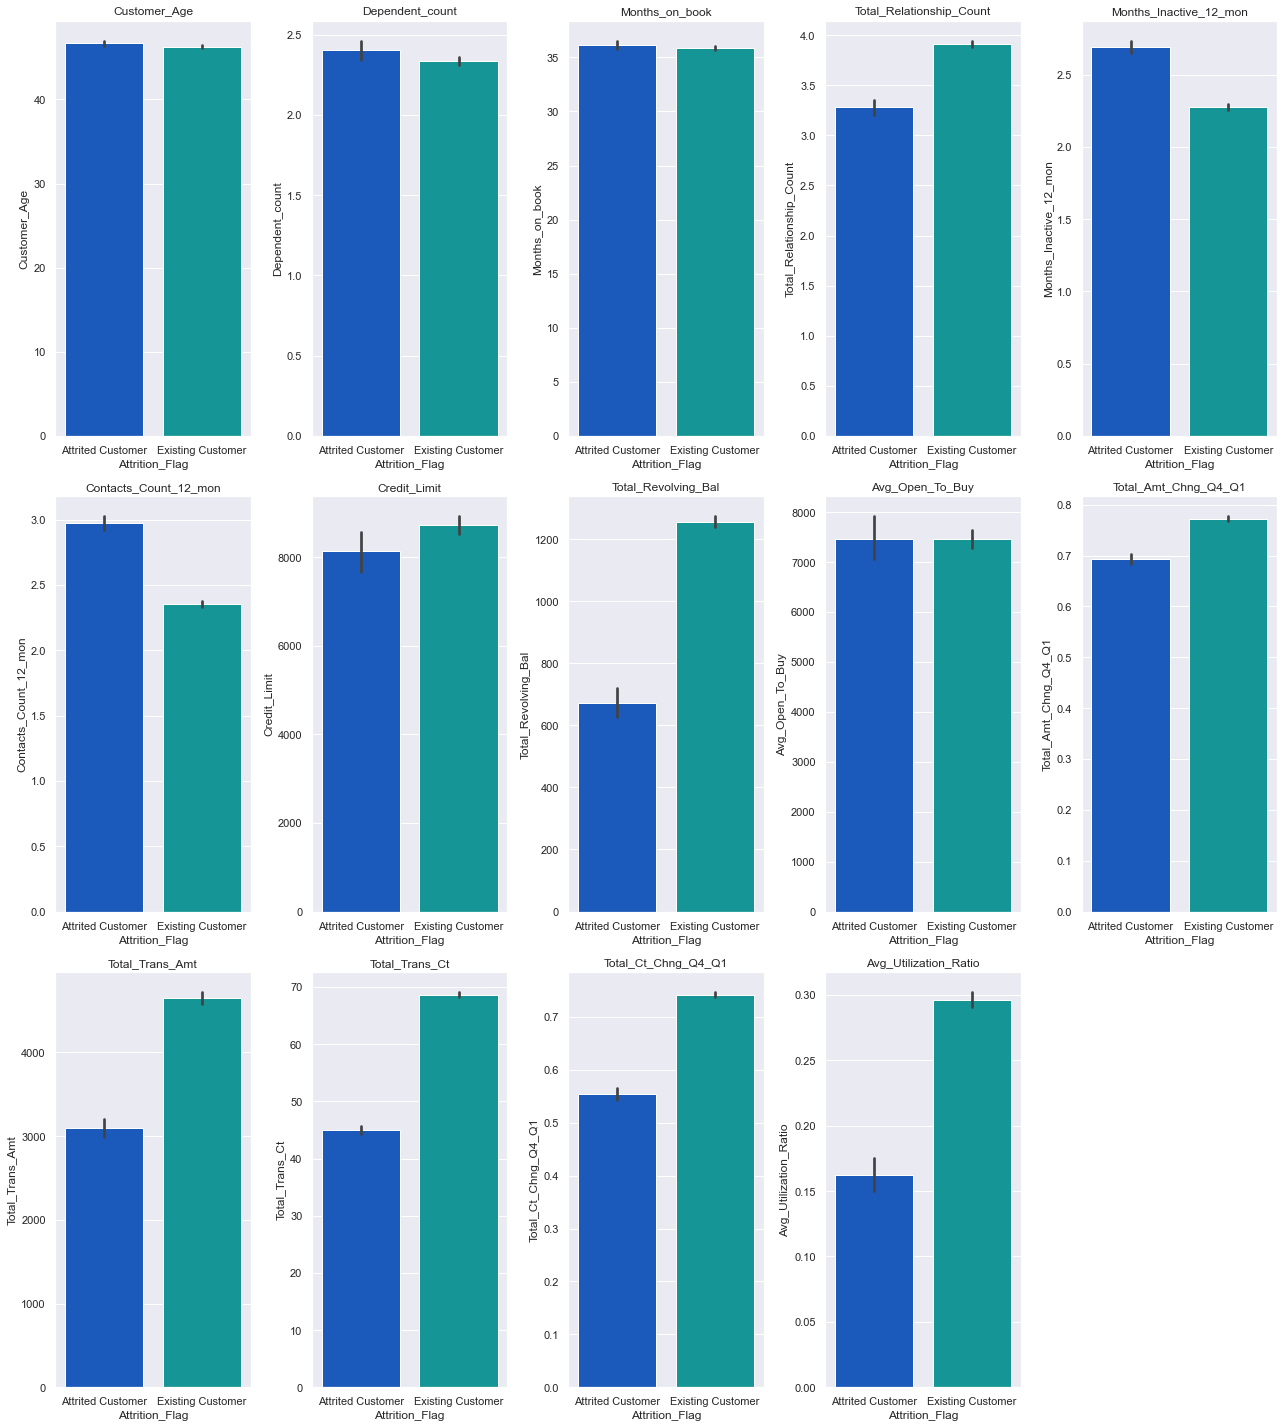

In [1136]:
cols = churn_bi[
    [
        'Customer_Age',
       'Dependent_count',
        'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' ]
].columns.tolist()
plt.figure(figsize=(18,20 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 5, i + 1)
    sns.barplot(churn_bi["Attrition_Flag"], churn_bi[variable], palette="winter")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Attrited customers have less products as compared to existing customers. So more the products a customer has , more the chance that the bank doesnot lose the customer.
2. Attrited customers have higher count of inactive period in last 12 months.
3. Attrited customers also of have higher contact counts with the bank.
4. Existing customers have higher Total_Revolving_Bal than attrited customers.
5. Customer_Age, Dependent_count and Months_on_book are slightly less for existing customers as compared to atrrited customers.
6. Avg_Open_To_Buy has no significant impact on customer attrition.
7. Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio are significantly less for atrrited customers as compared to existing customers.


<font color=darkorange>
<font size =4.5>
1.6.4 Plotting a Bar Plot Correlation between Card category and all other Dependent paparameters

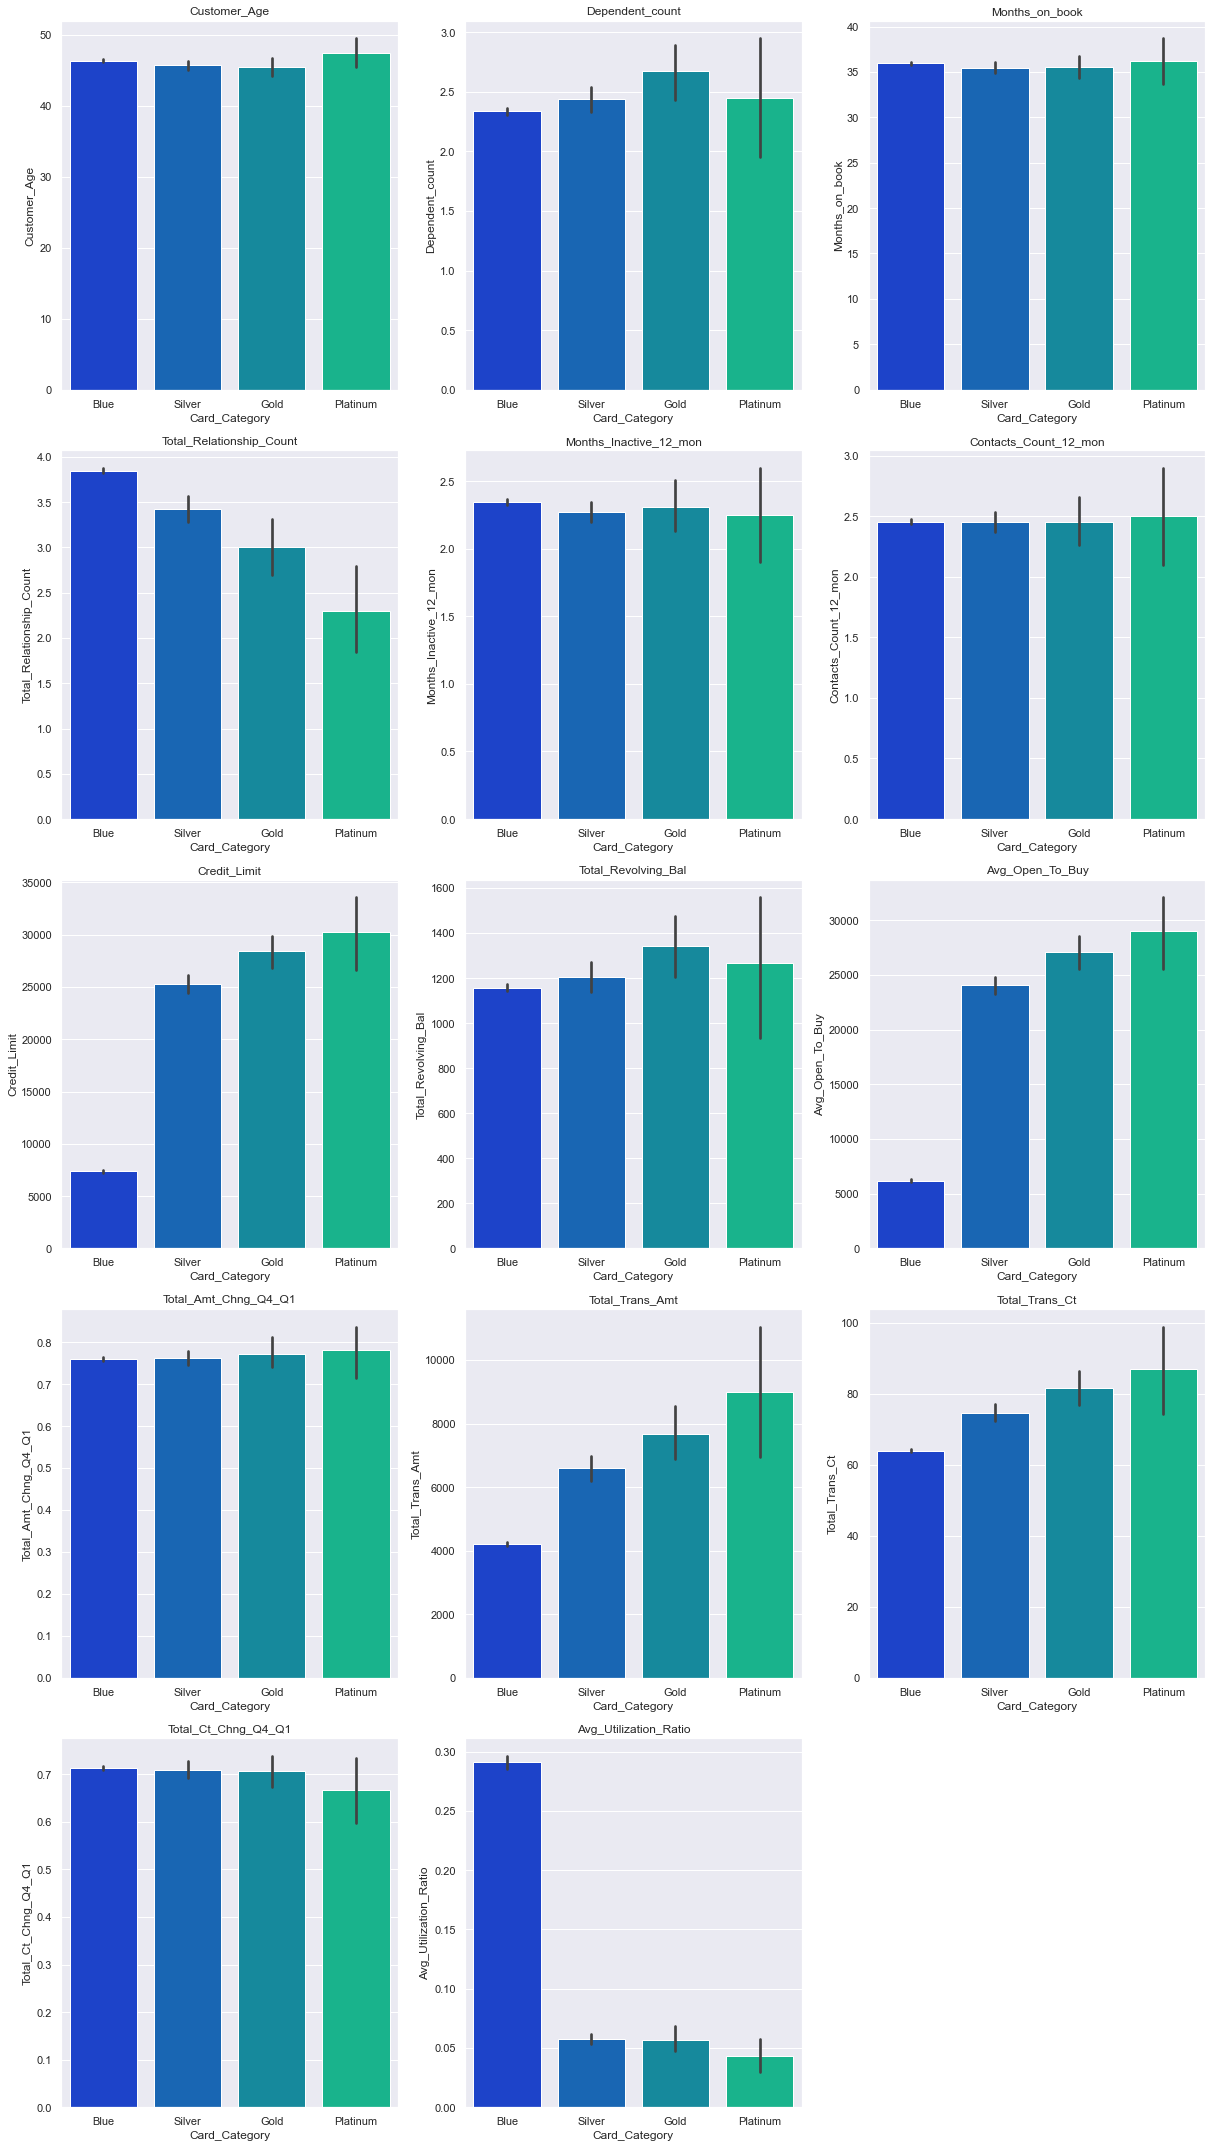

In [1137]:
cols = churn_bi[
    [
          'Customer_Age',
       'Dependent_count',
        'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' ]
].columns.tolist()
plt.figure(figsize=(17,30 ))

for i, variable in enumerate(cols):
    plt.subplot(5, 3, i + 1)
    x_order = ["Blue","Silver", "Gold", "Platinum"]
    sns.barplot(churn_bi["Card_Category"], churn_bi[variable], palette="winter", order = x_order)
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Higher age customers prefer more Platinum card
2. Customers with high dependent cout prefer Gold and Platinum card mostly.
3. Card category does not affect months on book significantly. Customer realtion ship with the bank has no impact by type of card.
4. Customers with blue card have more products from the bank, customers with gold or platinum have lesser products with bank.
5. Card category has no significant impact on Months_Inactive_12_mon or Contacts_Count_12_mon.
6. Platinum card has the highest credit limit and Avg_Open_To_Buy, blue card has the lowest credit limit and Avg_Open_To_Buy.
7. Total revolving balance for gold and platinum card is higher as compared to blue and silver card.
8. Total_Amt_Chng_Q4_Q1 is slightly higher for platinum as compared to blue.
9. Total_Trans_Amt and Total_Trans_Ct are highest for platinum and lowest for blue.
10. Total_Ct_Chng_Q4_Q1 is lowest for platinum.
11. Avg_Utilization_Ratio significantly high as compared to any other card.

<font color=darkorange>
<font size =4.5>
1.6.5 Plotting a Stacked Bar Plot Correlation between Customer Attrition and categorical Dependent paparameters

In [1138]:
def stacked_plot(x):
    
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, churn_bi["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, churn_bi["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(8,5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
  
    plt.show()
    

<font color=darkorange>
<font size =4.5>
1.6.5.1 Stacked Bar plot on Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


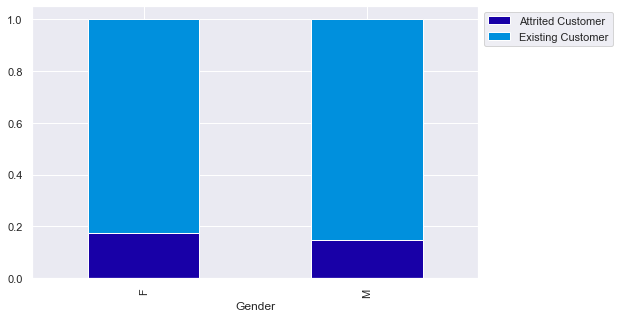

In [1139]:

stacked_plot(churn_bi["Gender"])


<font color=green>
<font size = 1>
# Observations :
Customer attrition is slightly higher in female than in male.


<font color=darkorange>
<font size =4.5>
1.6.5.2 Stacked Bar plot on Education Level

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
College                        154                859  1013
Doctorate                       95                356   451
Graduate                       487               2641  3128
High School                    306               1707  2013
Post-Graduate                   92                424   516
Uneducated                     237               1250  1487
All                           1371               7237  8608
------------------------------------------------------------------------------------------------------------------------


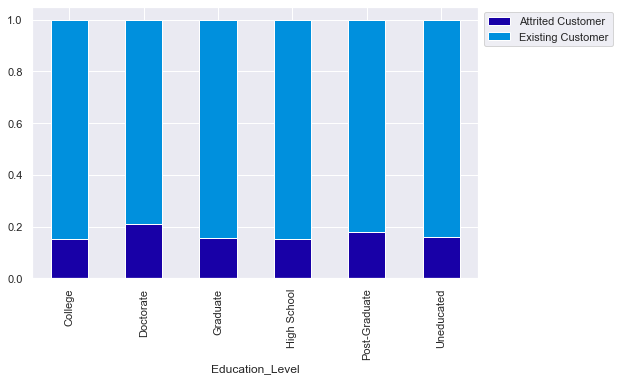

In [1140]:
stacked_plot(churn_bi["Education_Level"])

<font color=green>
<font size = 1>
# Observations :
Customers with higher education level, i.e. Post Graduate and Doctrate have higher customer attrition .


<font color=darkorange>
<font size =4.5>
1.6.5.3 Stacked Bar plot on  Marital Status

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
Divorced                      121                627   748
Married                       709               3978  4687
Single                        668               3275  3943
All                          1498               7880  9378
------------------------------------------------------------------------------------------------------------------------


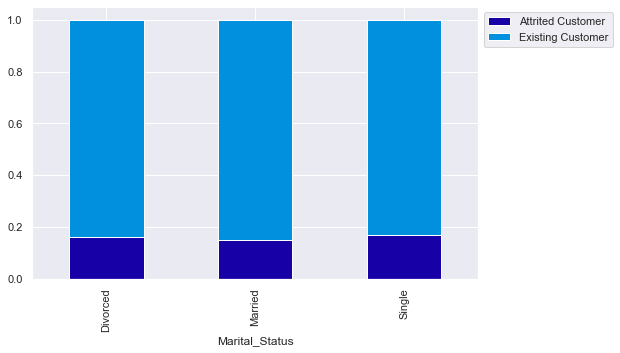

In [1141]:
stacked_plot(churn_bi["Marital_Status"])

<font color=green>
<font size = 1>
# Observations :
Single and Divorced customers have slightly higher atrrition rate as compared to married customers.


<font color=darkorange>
<font size =4.5>
1.6.5.4 Stacked Bar plot on Income_Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unkown                         187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


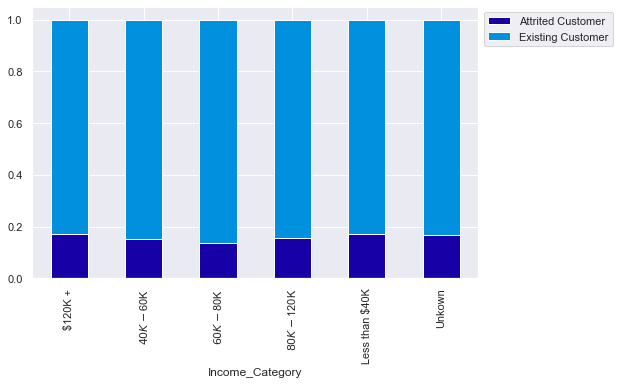

In [1142]:
stacked_plot(churn_bi["Income_Category"])

<font color=green>
<font size = 1>
# Observations :
Less than $40k, $ 120k + and unknown income category of customers have highest attriation rate. i.e. Customers likely to attriate are most liklely not to specify their income .


<font color=darkorange>
<font size =4.5>
1.6.5.5 Stacked Bar plot on Card Category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


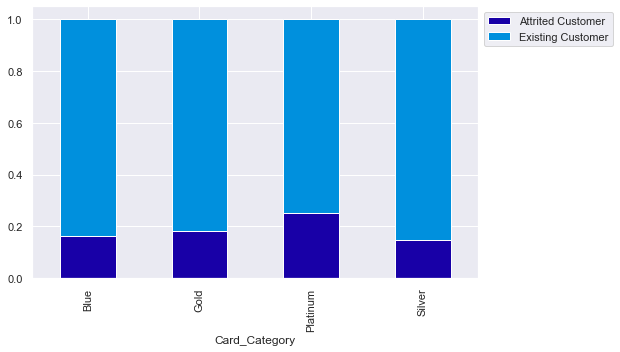

In [1143]:
stacked_plot(churn_bi["Card_Category"])

<font color=green>
<font size = 1>
# Observations :
Platinum card customers have highest attriation rate , most probably due to high annual rates. Silver card customers are least likely to churn.


<font color=darkorange>
<font size =4.5>
1.6.5.6 Stacked Bar plot on Dependent_count

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


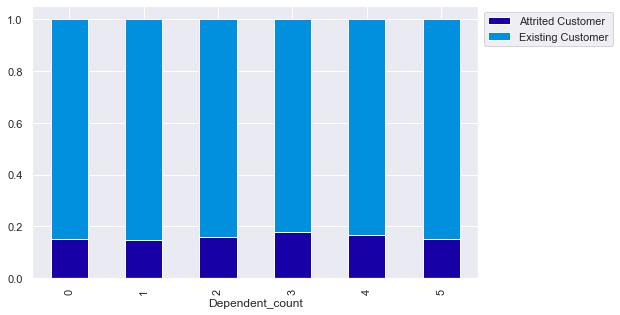

In [1144]:
stacked_plot(churn_bi["Dependent_count"])

<font color=green>
<font size = 1>
# Observations :
Customers with higher dependent count are more likely to churn, probably to avail new card welcome benefits. 


<font color=darkorange>
<font size =4.5>
1.6.5.7 Stacked Bar plot on Total_Relationship_Count

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


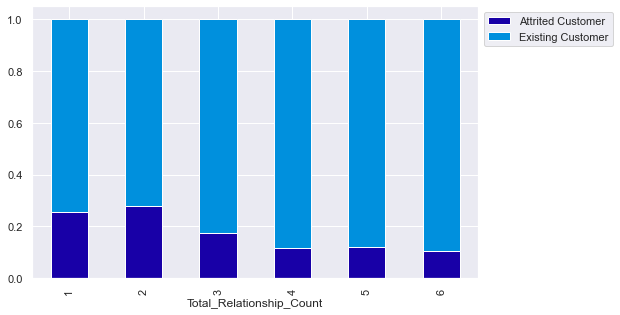

In [1145]:
stacked_plot(churn_bi["Total_Relationship_Count"])

<font color=green>
<font size = 1>
# Observations :
Customers with less product count are more likely to churn as compared to customers with more than 2 products.


<font color=darkorange>
<font size =4.5>
1.6.5.8 Stacked Bar plot on Months_Inactive_12_mon

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


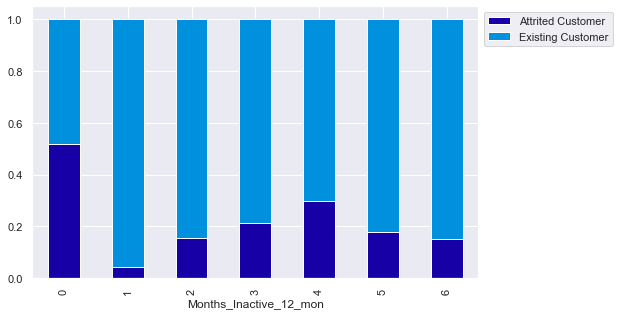

In [1146]:
stacked_plot(churn_bi["Months_Inactive_12_mon"])

<font color=green>
<font size = 1>
# Observations :
Customer attriation is highest when there is zero activity on the card in the last 12  months. So bank should contact customers with long inactive period to solve their issues and retain the customer base.


<font color=darkorange>
<font size =4.5>
1.6.5.9 Stacked Bar plot on Contacts_Count_12_mon

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


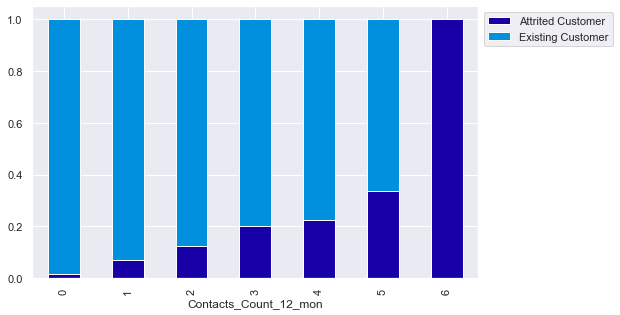

In [1147]:
stacked_plot(churn_bi["Contacts_Count_12_mon"])

<font color=green>
<font size = 1>
# Observations :
Customers with 6 contacts in last 12 months have always churned. Higher the number of contacts , higher is the churn rate.


<font color=darkorange>
<font size =4.5>
1.6.5.10 Stacked Bar plot on Months_on_book

In [1148]:
def stacked_plot1(x):
    
    sns.set(palette="nipy_spectral")
    tab = pd.crosstab(x, churn_bi["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(12,5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
  
    plt.show()

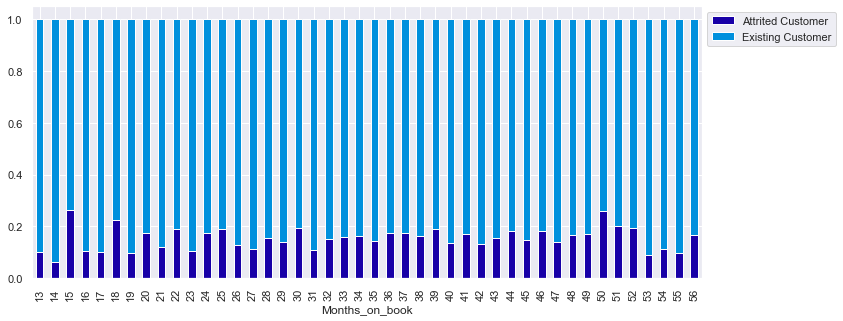

In [1149]:
stacked_plot1(churn_bi["Months_on_book"])

<font color=green>
<font size = 1>
# Observations :



<font color=darkorange>
<font size =4.5>
1.6.6 Binned data analysis

In [1150]:
#Making  a copy of the data set 
churn_bin = churn.copy()

<font color=darkorange>
<font size =4.5>
1.6.6.1 Observation on Avg_Open_To_Buy and customer attriation

<font color=green>
<font size = 1>

Need to bin Avg_Open_To_Buy to analyze.



In [1151]:
# Avg_Open_To_Buy binned for better categorization
binned_Avg_Open_To_Buy = pd.cut(churn_bin['Avg_Open_To_Buy'], [-np.inf,5000,10000,20000,30000, np.inf])
binned_Avg_Open_To_Buy.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Avg_Open_To_Buy_bin'] = pd.cut(
    churn_bin['Avg_Open_To_Buy'], [-np.inf,5000,10000,20000,30000, np.inf], 
    labels = [ "Less than 5000", "5k - 10k","10k - 20k", "20k - 30k", "30k and above"]
)

churn_bin['Avg_Open_To_Buy_bin'].value_counts(dropna=False)

Less than 5000    5989
5k - 10k          1642
10k - 20k         1329
30k and above      623
20k - 30k          544
Name: Avg_Open_To_Buy_bin, dtype: int64

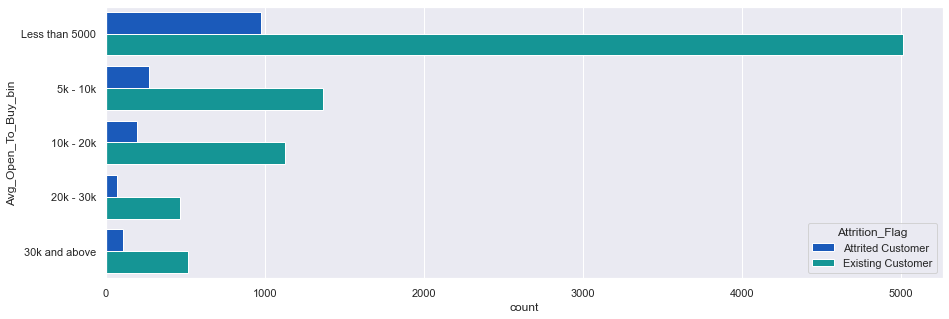

In [1152]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Avg_Open_To_Buy_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Most customers with less than 5k amount left on card to use are more likely to churn.
2. Higher the amount left on card less likely are the customers to churn.
3. Bank should contact customers who are maxing out their card limit and provide offers to improve their credit limit. Like increasing the credit limit on same card or provide another product with more privalages suitable for customer spending categories according to their spend analysis on grocery, fuel , travel and others.


<font color=darkorange>
<font size =4.5>
1.6.6.2 Observation on Binned Customer Age

In [1153]:
# Customer Age binned for better categorization
binned_age = pd.cut(churn_bin['Customer_Age'], [-np.inf,30,40,50,60,70,np.inf])
binned_age.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Customer_Age_bin'] = pd.cut(
    churn_bin['Customer_Age'], [-np.inf,30,40,50,60,70,np.inf], 
    labels = [ "Less than 30", "30 - 40","40 - 50", "50 - 60","60 - 70", "70 and above"]
)

churn_bin['Customer_Age_bin'].value_counts(dropna=False)

40 - 50         4652
50 - 60         2673
30 - 40         2132
60 - 70          404
Less than 30     265
70 and above       1
Name: Customer_Age_bin, dtype: int64

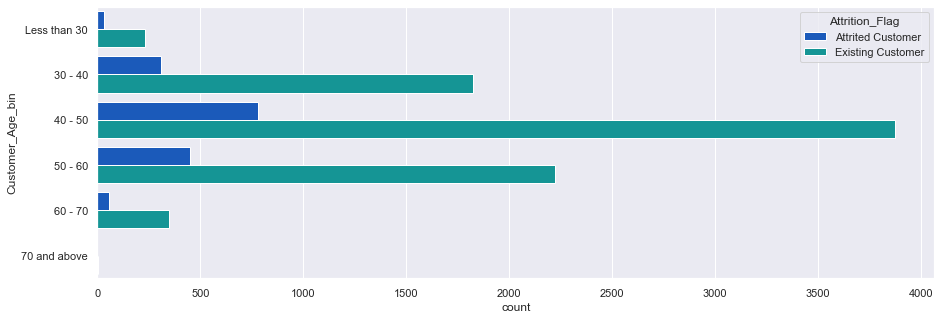

In [1154]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Customer_Age_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Attrited customers are maximum in the age group of 40-50


<font color=darkorange>
<font size =4.5>
1.6.6.3 Observation on  Binned Credit Limit and attriation

In [1155]:
# Credit Limit binned for better categorization
binned_Credit_Limit = pd.cut(churn_bin['Credit_Limit'], [-np.inf,5000,10000,20000,30000, np.inf])
binned_Credit_Limit.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Credit_Limit_bin'] = pd.cut(
    churn_bin['Credit_Limit'], [-np.inf,5000,10000,20000,30000, np.inf], 
    labels = [ "Less than 5000", "5k - 10k","10k - 20k", "20k - 30k", "30k and above"]
)

churn_bin['Credit_Limit_bin'].value_counts(dropna=False)

Less than 5000    5359
5k - 10k          2014
10k - 20k         1490
30k and above      667
20k - 30k          597
Name: Credit_Limit_bin, dtype: int64

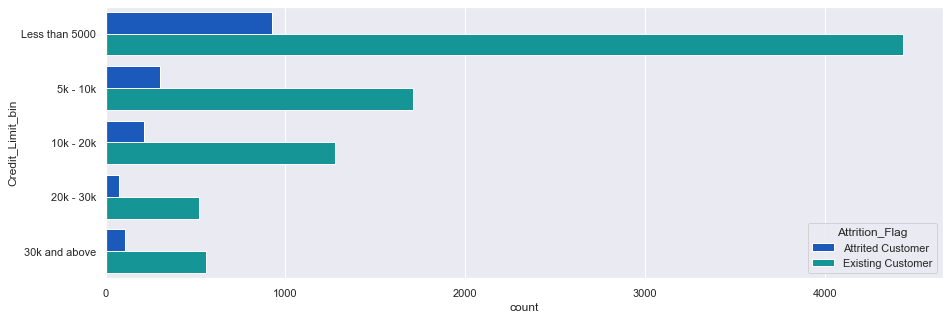

In [1156]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Credit_Limit_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Higher churn rate in customers with less than 5k credit limit.
2. There is a slight increase in churn rate for above 30k customers too.


<font color=darkorange>
<font size =4.5>
1.6.6.4 Observation on Total Revolving balance and attriation

In [1157]:
# Total_Revolving_Bal binned for better categorization
binned_Total_Revolving_Bal = pd.cut(churn_bin['Total_Revolving_Bal'], [-np.inf,0,500,1000,2000,np.inf])
binned_Total_Revolving_Bal.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Total_Revolving_Bal_bin'] = pd.cut(
    churn_bin['Total_Revolving_Bal'], [-np.inf,0,500,1000,2000,np.inf], 
    labels = [ "Zero", "0 - 500","500 - 1000", "1000 - 2000","2000 and above"]
)

churn_bin['Total_Revolving_Bal_bin'].value_counts(dropna=False)

1000 - 2000       4549
Zero              2470
2000 and above    1665
500 - 1000        1317
0 - 500            126
Name: Total_Revolving_Bal_bin, dtype: int64

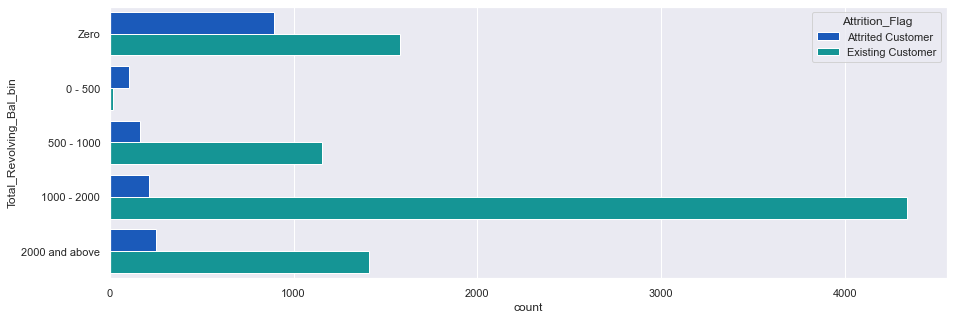

In [1158]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Total_Revolving_Bal_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Maximum existing customers have a total revolving balance of 1000-2000.
2. Folowed by zerro revolving balance.
3. Existing customers are very low in 0-1000
4. But Zero revolving balance customers also have higher churn rate , suggesting that their cards are not being utilized. Banks can reach out to these customers for providing them better card benifits as per their requirement.


<font color=darkorange>
<font size =4.5>
1.6.6.5 Observation on Binned Total transaction amount

In [1159]:
# Total_Trans_Amt binned for better categorization
binned_Total_Trans_Amt = pd.cut(churn_bin['Total_Trans_Amt'], [-np.inf,2500,5000,7500,10000,12500,15000, 17500,np.inf])
binned_Total_Trans_Amt.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Total_Trans_Amt_bin'] = pd.cut(
    churn_bin['Total_Trans_Amt'], [-np.inf,2500,5000,7500,10000,12500,15000, 17500,np.inf], 
    labels = [ "Less than 2500", "2500 - 5000","5000 - 7500", "7500 - 10000","10000 - 12500","12500 - 15000","15000 - 17500", "17500 and above"]
)

churn_bin['Total_Trans_Amt_bin'].value_counts(dropna=False)

2500 - 5000        5004
Less than 2500     3236
5000 - 7500         573
7500 - 10000        557
12500 - 15000       452
15000 - 17500       280
10000 - 12500        20
17500 and above       5
Name: Total_Trans_Amt_bin, dtype: int64

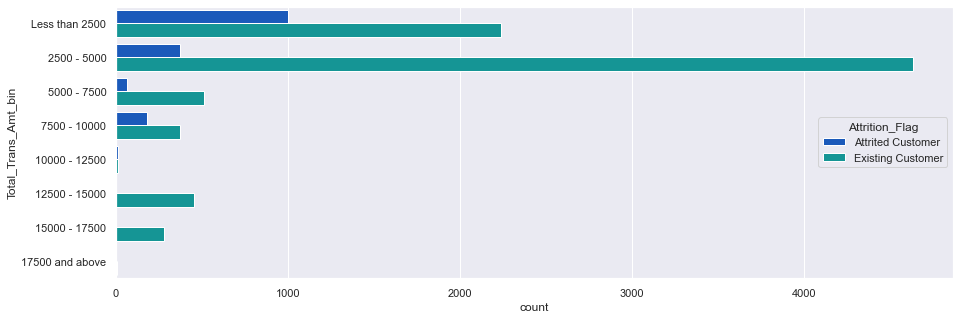

In [1160]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Total_Trans_Amt_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Mostly customer transaction amount is at an average of 0 - 5000.
2. Lower transaction amount has the highest attriation.
3. At higher transaction amount i.e. above 10000 there is hardly any attriation. Suggesting customer is using the credit card and is satisfied with the product.


<font color=darkorange>
<font size =4.5>
1.6.6.6 Observation on Binned Total transaction count

In [1161]:
# Total_Trans_Ct binned for better categorization
binned_Total_Trans_Ct = pd.cut(churn_bin['Total_Trans_Ct'], [-np.inf,20,40,80,120,np.inf])
binned_Total_Trans_Ct.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Total_Trans_Ct_bin'] = pd.cut(
    churn_bin['Total_Trans_Ct'], [-np.inf,20,40,80,120,np.inf], 
    labels = [ "Less than 20", "20 - 40","40 - 80", "80 - 120", "120 and above"]
)

churn_bin['Total_Trans_Ct_bin'].value_counts(dropna=False)

40 - 80          5639
80 - 120         2402
20 - 40          1819
120 and above     148
Less than 20      119
Name: Total_Trans_Ct_bin, dtype: int64

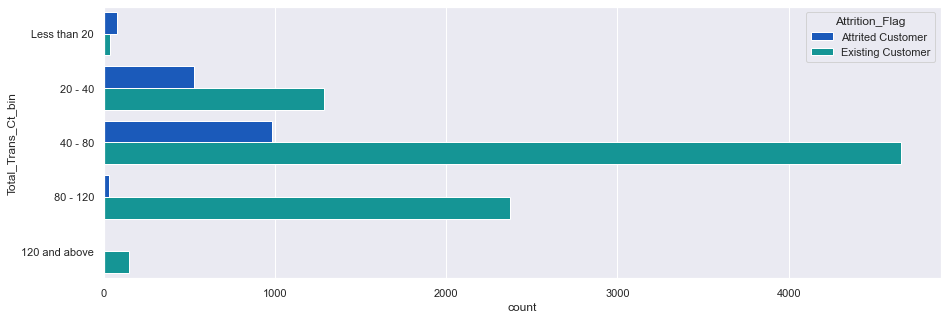

In [1162]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Total_Trans_Ct_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. If transaction count is less than 20 churn is high. 
2. If transaction count is more than 80 churn is very low almost nil.
3. Most customers have a transaction count of 20-80. Churn is highest in range 20-40.


<font color=darkorange>
<font size =4.5>
1.6.6.7 Observation on Binned Total_Ct_Chng_Q4_Q1

In [1163]:
# Customer Age binned for better categorization
binned_Total_Ct_Chng_Q4_Q1 = pd.cut(churn_bin['Total_Ct_Chng_Q4_Q1'], [-np.inf,0.5,1.5,2.5,3.5,np.inf])
binned_Total_Ct_Chng_Q4_Q1.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Total_Ct_Chng_Q4_Q1_bin'] = pd.cut(
    churn_bin['Total_Ct_Chng_Q4_Q1'], [-np.inf,0.5,1.5,2.5,3.5,np.inf], 
    labels = [ "Less than 0.5", "0.5-1.5","1.5 - 2.5", "2.5 - 3.5","3.5 and above"]
)

churn_bin['Total_Ct_Chng_Q4_Q1_bin'].value_counts(dropna=False)

0.5-1.5          8515
Less than 0.5    1531
1.5 - 2.5          72
2.5 - 3.5           7
3.5 and above       2
Name: Total_Ct_Chng_Q4_Q1_bin, dtype: int64

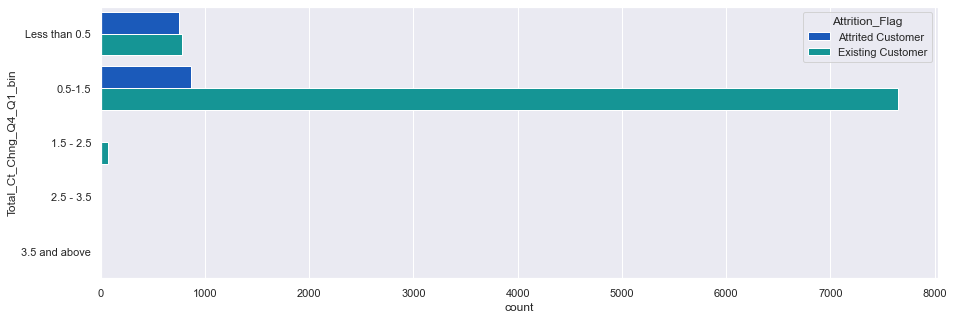

In [1164]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Total_Ct_Chng_Q4_Q1_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Attrited customers are highest when total transaction count has reduced from Q4 to Q1.
2. Maximum existing customers have Total_Ct_Chng_Q4_Q1 of 0.5-1.5


<font color=darkorange>
<font size =4.5>
1.6.6.8 Observation on Binned Total_Amt_Chng_Q4_Q1

In [1165]:
# Customer Age binned for better categorization
binned_Total_Amt_Chng_Q4_Q1 = pd.cut(churn_bin['Total_Amt_Chng_Q4_Q1'], [-np.inf,0.5,1.5,2.5,3.5,np.inf])
binned_Total_Amt_Chng_Q4_Q1.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Total_Amt_Chng_Q4_Q1_bin'] = pd.cut(
    churn_bin['Total_Amt_Chng_Q4_Q1'], [-np.inf,0.5,1.5,2.5,3.5,np.inf], 
    labels = [ "Less than 0.5", "0.5-1.5","1.5 - 2.5", "2.5 - 3.5","3.5 and above"]
)

churn_bin['Total_Amt_Chng_Q4_Q1_bin'].value_counts(dropna=False)

0.5-1.5          9276
Less than 0.5     742
1.5 - 2.5         105
2.5 - 3.5           4
3.5 and above       0
Name: Total_Amt_Chng_Q4_Q1_bin, dtype: int64

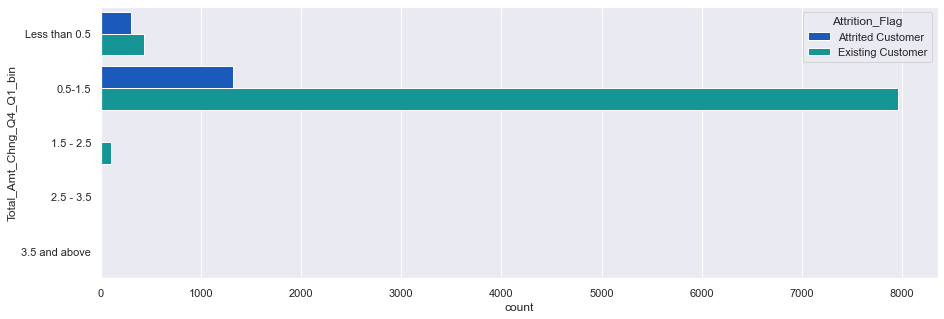

In [1166]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Total_Amt_Chng_Q4_Q1_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Attrited customers are highest when total transaction amount has reduced from Q4 to Q1.
2. Maximum existing customers have Total_Amt_Chng_Q4_Q1 of 0.5-1.5


<font color=darkorange>
<font size =4.5>
1.6.6.9 Observation on Binned Avg_Utilization_Ratio

In [1167]:
# Customer Age binned for better categorization
binned_Avg_Utilization_Ratio = pd.cut(churn_bin['Avg_Utilization_Ratio'], [-np.inf,0.2,0.4,0.6,0.8,np.inf])
binned_Avg_Utilization_Ratio.value_counts(dropna=False)
# Assigning labels to categories
churn_bin['Avg_Utilization_Ratio_bin'] = pd.cut(
    churn_bin['Avg_Utilization_Ratio'], [-np.inf,0.2,0.4,0.6,0.8,np.inf], 
    labels = [ "0 - 0.2", "0.2 - 0.4","0.4 - 0.6", "0.6 - 0.8","0.8 - 1"]
)

churn_bin['Avg_Utilization_Ratio_bin'].value_counts(dropna=False)

0 - 0.2      5346
0.2 - 0.4    1565
0.4 - 0.6    1414
0.6 - 0.8    1335
0.8 - 1       467
Name: Avg_Utilization_Ratio_bin, dtype: int64

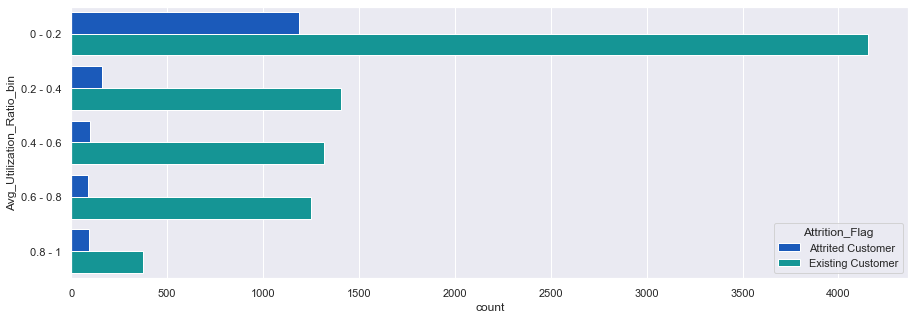

In [1168]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Avg_Utilization_Ratio_bin',hue ='Attrition_Flag', data= churn_bin, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Attrited customers rate is highest when Avg_Utilization_Ratio is less than 0.2.
2. Higher than 0.2 customer churn is very low. Most customers are existing customers.


<font color=darkorange>
<font size =4.5>
1.6.7 Observation on distribution of different parameters on Attrition flag.

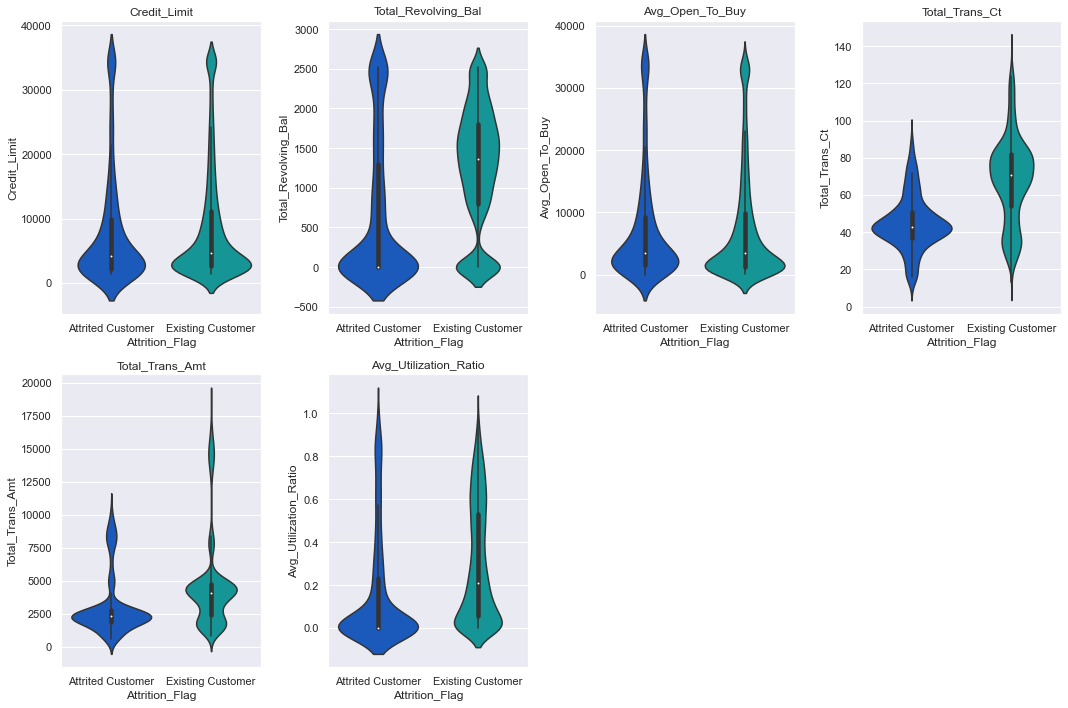

In [1169]:
cols = churn_bin[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy','Total_Trans_Ct', 'Total_Trans_Amt','Avg_Utilization_Ratio']].columns.tolist()
plt.figure(figsize=(15,10))

for i, variable in enumerate(cols):
                     plt.subplot(2,4,i+1)
                     sns.violinplot(churn_bin['Attrition_Flag'],churn_bin[variable],palette="winter")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Credit limit looks equally distributed for both atrried and existing customers.
2. Customer attriation has higher probability at zero total revolving balance.
3. Customer attriation has higher probability at lower total transaction count.


<font color=darkcyan>
<font size =5>
1.7 Data Preprocessing

<font color=darkorange>
<font size =4.5>
1.7.1 Preparing data for Analysis

In [1170]:
churn2 = churn.copy()# Making a copy so that we donot modify original data set

In [1171]:
## Converting the data type of categorical features to 'object' for KNN Imputer analysis
cat_cols = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' ]
churn2[cat_cols] = churn2[cat_cols].astype('object')

In [1172]:
churn2.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
Avg_Utilization_Ratio          0
Total_Ct_Chng_Q4_Q1            0
Customer_Age                   0
Gender                         0
Dependent_count                0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Attrition_Flag                 0
dtype: int64

<font color=darkorange>
<font size =4.5>
1.7.2 Outlier detection using box plot

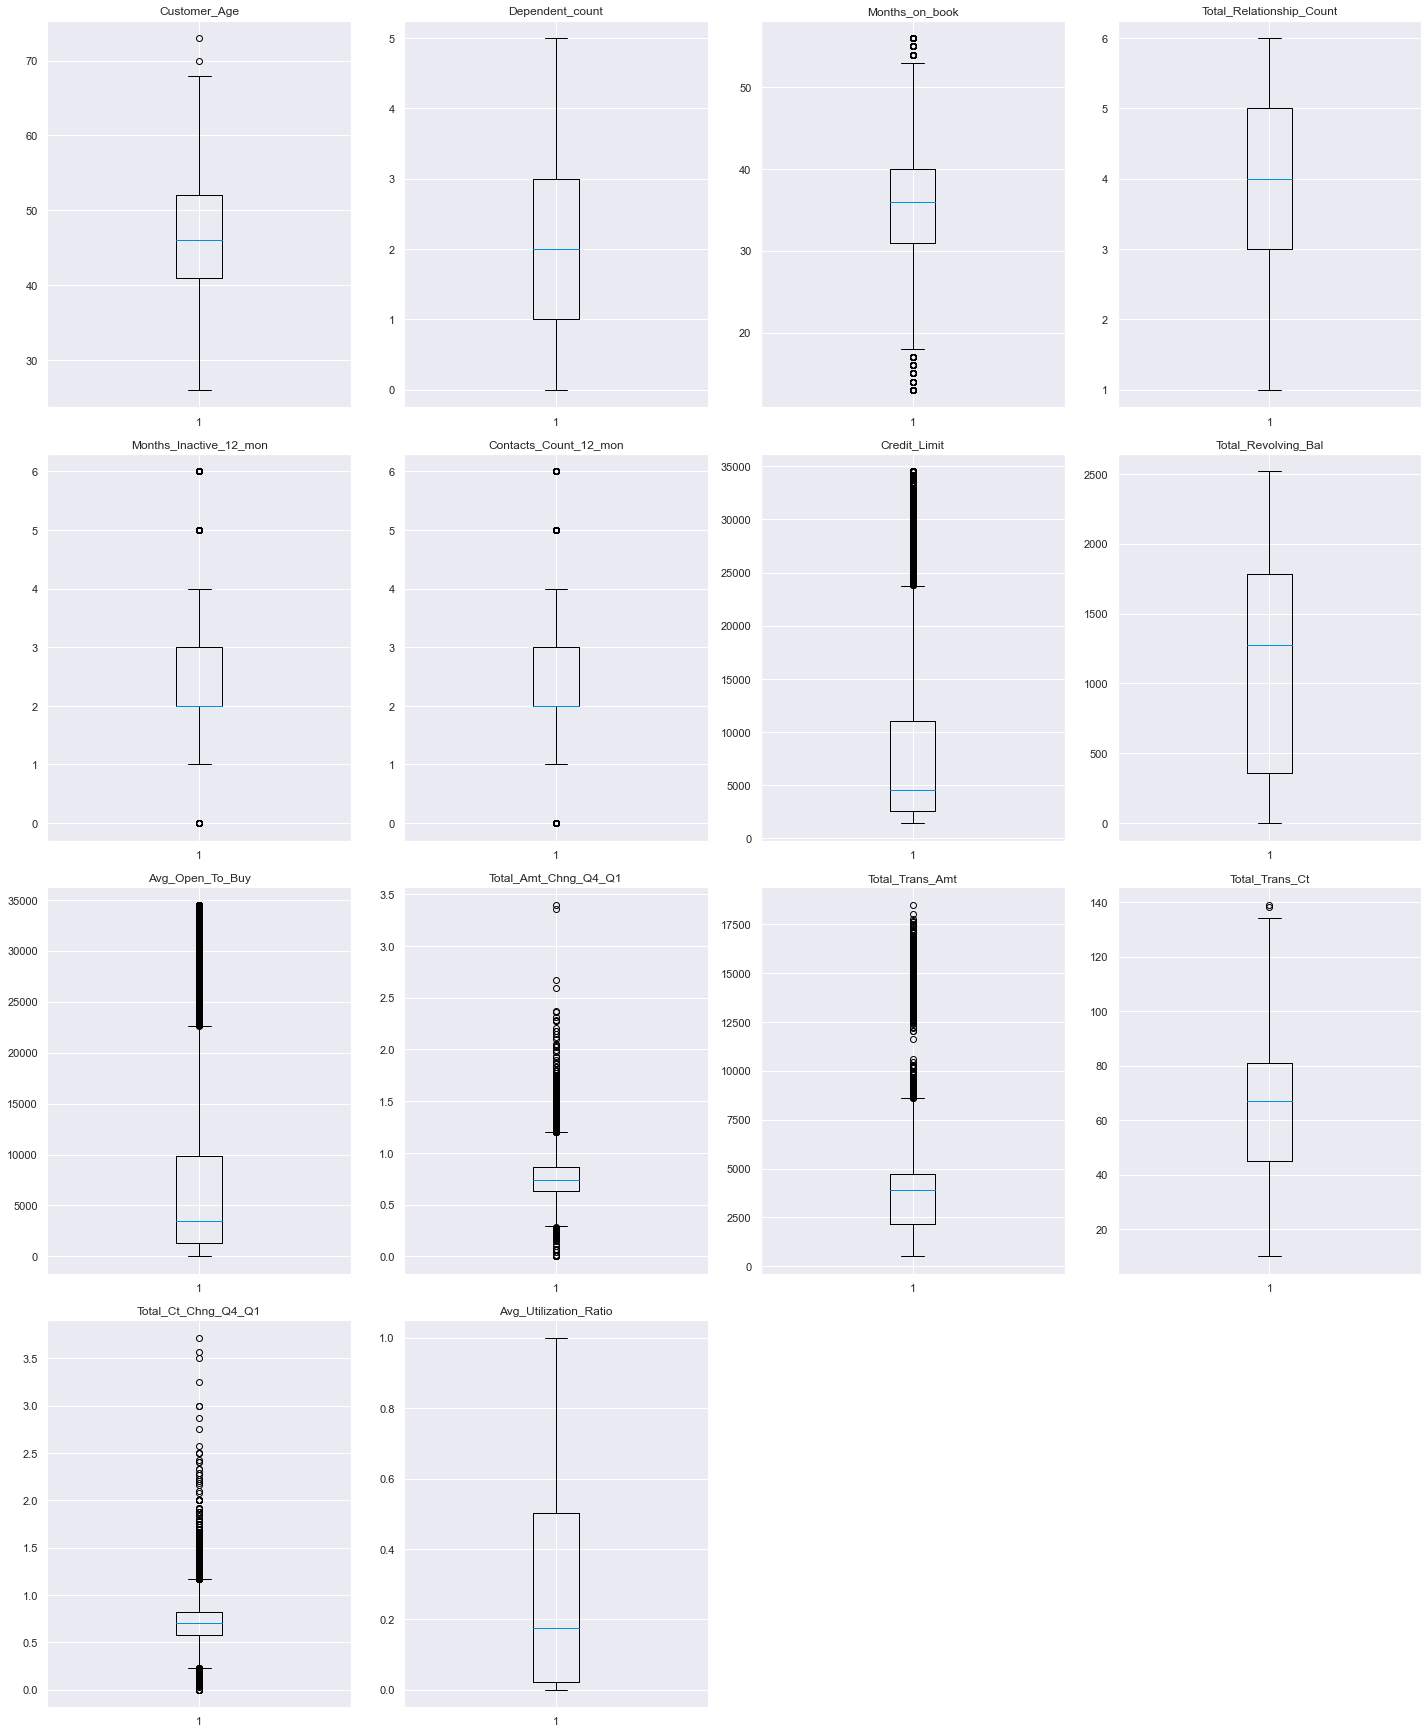

In [1173]:
# Plot the outliers for all parameters.

numerical_col = churn2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(churn2[variable])
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

There appear to be a few outliers in most of the data.
But as these appear to be valid data and useful in predicting customer attriation rate.
Hence treating these outliers might cause a loss of valuable information, therefore affecting the performance of the prediction model.
So decided not to treat the outliers to avoid loss of information.

<font color=darkorange>
<font size =4.5>
1.7.3 Missing value treatment

<font color = 'green'>

* We will be using KNN imputer to impute missing values and replace missing values by the average of k nearest non-missing feature values.

<font color=darkorange>
<font size =4.5>
1.7.3.1  Detecting missing values and preparing data for KNN imputer.

In [1174]:
# Detecting missing values
churn2.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [1175]:
# Defining imputer with k = 5
imputer = KNNImputer(n_neighbors=5)

In [1176]:
# Defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Marital_Status",
    "Education_Level",
]

In [1177]:
# Columns to impute
churn2[reqd_col_for_impute].tail(10)

Marital_Status Education_Level
10117        Married        Graduate
10118            NaN             NaN
10119         Single      Uneducated
10120         Single     High School
10121         Single        Graduate
10122         Single        Graduate
10123       Divorced             NaN
10124        Married     High School
10125            NaN        Graduate
10126        Married        Graduate

In [1178]:
#Making a copy 
churn_data = churn2.copy()

In [1179]:
# Passing numerical values for each categorical column for KNN imputation so we will label encode them

Education_Level = {
    "Graduate": 0,
    "High School": 1,
    "College": 2,
    "Uneducated": 3,
    "Post-Graduate": 4,
    "Doctorate": 5,
}
churn_data["Education_Level"] = churn_data["Education_Level"].map(Education_Level)

Marital_Status = {
    "Married": 0,
    "Single": 1,
    "Divorced": 2,
}
churn_data["Marital_Status"] = churn_data["Marital_Status"].map(Marital_Status)

Attrition_Flag = {
    "Attrited Customer": 0,
    "Existing Customer": 1,
}
churn_data["Attrition_Flag"] = churn_data["Attrition_Flag"].map(Attrition_Flag)



In [1180]:
# Encoded data frame
churn_data.tail(10)

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
10117               1            57      M                2              0.0   
10118               0            50      M                1              NaN   
10119               0            55      F                3              3.0   
10120               1            54      M                1              1.0   
10121               1            56      F                1              0.0   
10122               1            50      M                2              0.0   
10123               0            41      M                2              NaN   
10124               0            44      F                1              1.0   
10125               0            30      M                2              0.0   
10126               0            43      F                2              0.0   

       Marital_Status Income_Category Card_Category  Months_on_book  \
10117             0.0    $80K - $120K          Blue              40   
10118             NaN    $80K - $120K          Blue              36   
10119             1.0          Unkown          Blue              47   
10120             1.0     $60K - $80K          Blue              34   
10121             1.0  Less than $40K          Blue              50   
10122             1.0     $40K - $60K          Blue              40   
10123             2.0     $40K - $60K          Blue              25   
10124             0.0  Less than $40K          Blue              36   
10125             NaN     $40K - $60K          Blue              36   
10126             0.0  Less than $40K        Silver              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
10117                         6                       3   
10118                         6                       3   
10119                         4                       3   
10120                         5                       2   
10121                         4                       1   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10117                      4       17925.0                 1909   
10118                      4        9959.0                  952   
10119                      3       14657.0                 2517   
10120                      0       13940.0                 2109   
10121                      4        3688.0                  606   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10117          16016.0                 0.712            17498             111   
10118           9007.0                 0.825            10310              63   
10119          12140.0                 0.166             6009              53   
10120          11831.0                 0.660            15577             114   
10121           3082.0                 0.570            14596             120   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10117       

<font color = 'green'>
    
* Values have been encoded.

<font color=darkcyan>
<font size =5>
1.8 Model Building - Data Preparation

<font color=darkorange>
<font size =4.5>
1.8.1 Split the Data

In [1181]:
churn_m =churn_data.copy()

In [1182]:
X = churn_m.drop(["Attrition_Flag"], axis=1)
y = churn_m["Attrition_Flag"]

In [1183]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [1184]:
# Check the Number of rows in train , validation and test after split
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [1185]:
# Check the Percentage of data after split in each set
print("{0:0.2f}% data is in training set".format((len(X_train)/len(churn_m.index)) * 100))
print("{0:0.2f}% data is in validation set".format((len(X_val)/len(churn_m.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(churn_m.index)) * 100))

59.99% data is in training set
20.01% data is in validation set
20.01% data is in test set


<font color=darkorange>
<font size =4.5>
1.8.2 Check Customer Attrition Ratio and Percentage in split data 

In [1186]:
# Percentage customer attrition in Original data set
print("Original Customer Attrition False Values    : {0} ({1:0.2f}%)".format(len(churn_m.loc[churn_m['Attrition_Flag'] == 1]), (len(churn_m.loc[churn_m['Attrition_Flag'] == 1])/len(churn_m.index)) * 100))
print("Original Customer Attrition True Values   : {0} ({1:0.2f}%)".format(len(churn_m.loc[churn_m['Attrition_Flag'] == 0]), (len(churn_m.loc[churn_m['Attrition_Flag'] == 0])/len(churn_m.index)) * 100))
print("")
# Percentage customer attrition in Training data set
print("Training Customer Attrition False Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Customer Attrition True Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
# Percentage customer attrition in Validation data set
print("Validation Customer Attrition False Values    : {0} ({1:0.2f}%)".format(len(y_val[y_val[:] == 1]), (len(y_val[y_val[:] == 1])/len(y_val)) * 100))
print("Validation Customer Attrition True Values   : {0} ({1:0.2f}%)".format(len(y_val[y_val[:] == 0]), (len(y_val[y_val[:] == 0])/len(y_val)) * 100))
print("")
# Percentage customer attrition in Test data set
print("Test Customer Attrition False Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Customer Attrition True Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Customer Attrition False Values    : 8500 (83.93%)
Original Customer Attrition True Values   : 1627 (16.07%)

Training Customer Attrition False Values    : 5099 (83.93%)
Training Customer Attrition True Values   : 976 (16.07%)

Validation Customer Attrition False Values    : 1700 (83.91%)
Validation Customer Attrition True Values   : 326 (16.09%)

Test Customer Attrition False Values        : 1701 (83.96%)
Test Customer Attrition True Values       : 325 (16.04%)



<font color=darkorange>
<font size =4.5>
1.8.3 Imputing Missing Values

In [1187]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.fit_transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [1188]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

<font color = 'green'>
    
* All missing values have been treated.
* Let's inverse map the encoded values.


<font color=darkorange>
<font size =4.5>
1.8.4 Inverse mapping encoded values

In [1189]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [1190]:
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Marital_Status, "Marital_Status")

<font color=darkorange>
<font size =4.5>

1.8.4.1 Checking inverse mapped values/categories.

In [1191]:
# Checking inverse mapped values in training data set
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3205
M    2870
Name: Gender, dtype: int64
******************************
High School      2048
Graduate         1866
Uneducated        928
College           659
Post-Graduate     299
Doctorate         275
Name: Education_Level, dtype: int64
******************************
Married     3000
Single      2626
Divorced     449
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2130
$40K - $60K       1076
$80K - $120K       918
$60K - $80K        847
Unkown             668
$120K +            436
Name: Income_Category, dtype: int64
******************************
Blue        5668
Silver       327
Gold          71
Platinum       9
Name: Card_Category, dtype: int64
******************************


In [1192]:
# Checking inverse mapped values in validation data set
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1106
M     920
Name: Gender, dtype: int64
******************************
Graduate         627
High School      551
College          373
Uneducated       278
Post-Graduate    108
Doctorate         89
Name: Education_Level, dtype: int64
******************************
Married     937
Single      934
Divorced    155
Name: Marital_Status, dtype: int64
******************************
Less than $40K    712
$40K - $60K       340
$80K - $120K      306
$60K - $80K       280
Unkown            248
$120K +           140
Name: Income_Category, dtype: int64
******************************
Blue        1893
Silver       108
Gold          19
Platinum       6
Name: Card_Category, dtype: int64
******************************


In [1193]:
## Checking inverse mapped values in test data set
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1047
M     979
Name: Gender, dtype: int64
******************************
Graduate         635
High School      561
College          353
Uneducated       281
Post-Graduate    109
Doctorate         87
Name: Education_Level, dtype: int64
******************************
Married     990
Single      892
Divorced    144
Name: Marital_Status, dtype: int64
******************************
Less than $40K    719
$40K - $60K       374
$80K - $120K      311
$60K - $80K       275
Unkown            196
$120K +           151
Name: Income_Category, dtype: int64
******************************
Blue        1875
Silver       120
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


<font color = 'green'>
    
* Inverse mapping returned original labels.

<font color=darkorange>
<font size =4.5>

1.8.5 Creating Dummy Variables

In [1194]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 30) (2026, 30) (2026, 30)


<font color = 'green'>
    
* After encoding there are 30 columns.

<font color=darkcyan>
<font size =5>
1.9 Model Building - Model evaluation criterion

<font color = 'green'>

### Model can make wrong predictions as:
1. Predicting we will lose a customer but he does not leave.
2. Predicting we will not lose a customer but he attriates.

### Which case is more important? 
* Predicting a customer will not attriate but he attriates, this is big loss for the bank. As we lose the customer and do nothing to retain the customer.i.e False Negative. hence we need to improve `recall` to balance for this.
* Predicting customer will leave but he stays does not affect the bank that much , as we will not lose the customer, just some extra marketing to retain the customer. 


### How to reduce this loss i.e need to reduce False Negatives?
* We need to help the bank improve its services so that customers do not renounce their credit cards. That is bank does not lose customers, hence here we need to reduce False Negatives, `recall' is an important factor here. Bank would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

<font color=darkcyan>
<font size =5>
1.10 Model Building 

<font color=darkorange>
<font size =4.5>
1.10.1 Functions for model Performance metrics

In [1195]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [1196]:
#Function for confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<font color=darkorange>
<font size =4.5>
1.10.2 Model Building - Logistic Regression, Bagging, Random Forest, GBM, Adaboost, Xgboost, Decission Tree

In [1197]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

training_score = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
val_score = []
# loop through all models to get the mean cross validated score
print("\n" "Training Recall Score:" "\n")
for name, model in models:
    scoring = "recall"
 # Evaluating the model performance by using KFold and cross_val_score  
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    # Appending the result
    training_score.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Recall Score:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    val_score.append(scores)
    
    print("{}: {}".format(name, scores*100))


Training Recall Score:

Logistic Regression: 96.13654293905982
Bagging: 97.23506321076026
Random forest: 98.66649348650157
GBM: 98.78412130308453
Adaboost: 97.88196809636514
Xgboost: 98.70568993053551
dtree: 96.13671611922493

Validation Recall Score:

Logistic Regression: 97.11764705882354
Bagging: 97.70588235294117
Random forest: 98.52941176470588
GBM: 98.88235294117646
Adaboost: 98.23529411764706
Xgboost: 98.94117647058823
dtree: 96.29411764705881


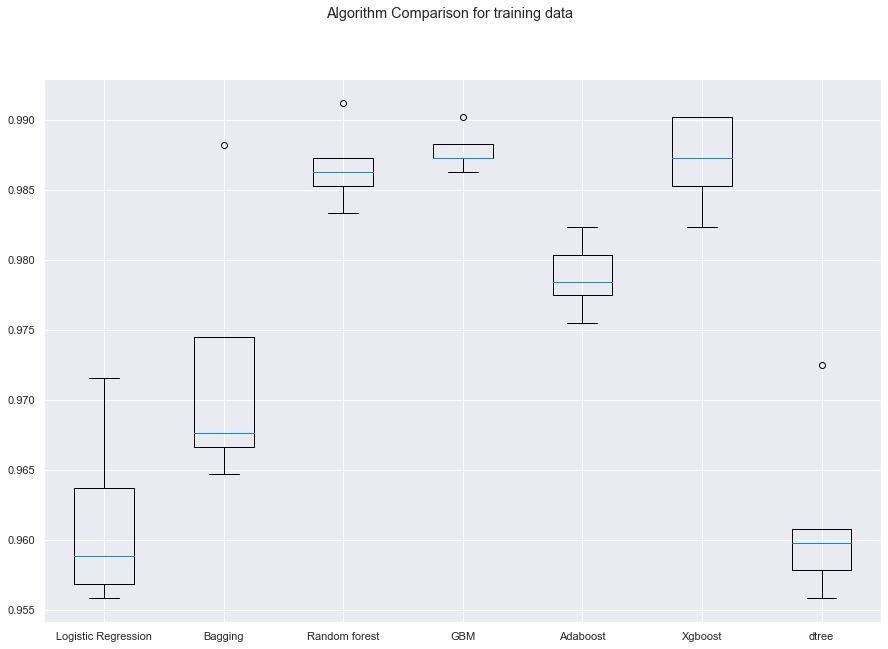

In [1198]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Algorithm Comparison for training data")
ax = fig.add_subplot(111)
plt.boxplot(training_score)
ax.set_xticklabels(names)
plt.show()


<font color = 'green'>
    
- We can see that the XGBoost model is giving the highest validation recall followed by Gradient boost Algorithm and Adaboost algorithm.
- We will tune the best three models i.e. 
    1) Xgboost Model
    2) Gradient boost Model
    3) Adaboost Model

<font color=darkcyan>
<font size =5>
1.11 Model Tuning using Random Search

<font color = 'green'>

### Model can make wrong predictions as:
1. Predicting we will lose a customer but he does not leave.
2. Predicting we will not lose a customer but he attriates.

### Which case is more important? 
* Predicting a customer will not attriate but he attriates, this is big loss for the bank. As we lose the customer and do nothing to retain the customer.i.e False Negative. hence we need to improve `recall` to balance for this.
* Predicting customer will leave but he stays does not affect the bank that much , as we will not lose the customer, just some extra marketing to retain the customer. 


### How to reduce this loss i.e need to reduce False Negatives?
* We need to help the bank improve its services so that customers do not renounce their credit cards. That is bank does not lose customers, hence here we need to reduce False Negatives, `recall' is an important factor here. Bank would want Recall to be maximized, greater the Recall lesser the chances of false negatives.
    
    
    
    As Recall is the most important metric , we will hper tune our models based on Recall.
    From above model comparision , We can see that the XGBoost model is giving the highest validation recall followed by Gradient boost Algorithm and Adaboost algorithm.
    We will tune the best three models i.e. 
    1) Xgboost Model
    2) Gradient boost Model
    3) Adaboost Model

<font color=darkorange>
<font size =4.5>
1.11.1 Functions for model Performance metrics

In [1199]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    
    
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_val,y_val)
    
    
    train_recall = metrics.recall_score(y_train,pred_train)
    val_recall = metrics.recall_score(y_val,pred_val)
    
    
    train_precision = metrics.precision_score(y_train,pred_train)
    val_precision = metrics.precision_score(y_val,pred_val)
    
    
    train_f1 = f1_score(y_train,pred_train)
    val_f1 = f1_score(y_val,pred_val)
    
    
    score_list.extend((train_acc,val_acc,train_recall,val_recall,train_precision,val_precision, train_f1,val_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on validation set : ",model.score(X_val,y_val))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on validation set : ",metrics.recall_score(y_val,pred_val))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on validation set : ",metrics.precision_score(y_val,pred_val))       
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on validation set : ",metrics.f1_score(y_val,pred_val))
        
    
    return score_list # returning the list with train and test scores

In [1200]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score1(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_val,y_val)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    val_recall = metrics.recall_score(y_val,pred_val)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    val_precision = metrics.precision_score(y_val,pred_val)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    val_f1 = f1_score(y_val,pred_val)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,val_acc,test_acc,train_recall,val_recall,test_recall,train_precision,val_precision,test_precision, train_f1,val_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on validation set : ",model.score(X_val,y_val))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on validation set : ",metrics.recall_score(y_val,pred_val))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on validation set : ",metrics.precision_score(y_val,pred_val))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on validation set : ",metrics.f1_score(y_val,pred_val))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [1201]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target,flag = True):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )
    
 
        
       
    

    return df_perf


In [1202]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<font color=darkorange>
<font size =4.5>
1.11.2 Gradient boosting model :RandomizedSearchCV

In [1203]:
# Creating pipeline
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
  "n_estimators": [25, 50, 100,150],
    "subsample":[0.7, 0.8,0.9,1],
    "max_features":['sqrt',0.7,0.8,0.9],
    'min_samples_leaf': np.arange(2,15,5),
    "max_depth":[3,5,7,10, 20, 25],

    
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 1, 'n_estimators': 50, 'min_samples_leaf': 12, 'max_features': 0.8, 'max_depth': 3} with CV score=0.9894094556370143:


In [1204]:
# Creating new pipeline with best parameters
GBM_tuned = GradientBoostingClassifier(
    random_state=1, subsample= 1, n_estimators = 50, max_features = 0.8, min_samples_leaf =12,max_depth =3
)

# Fit the model on training data
GBM_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, min_samples_leaf=12,
                           n_estimators=50, random_state=1, subsample=1)

In [1205]:
# Calculating different metrics on train set
print("Training performance:")
GBM_random_train = model_performance_classification_sklearn(
    GBM_tuned, X_train, y_train
)

GBM_random_train

Training performance:


Accuracy    Recall  Precision       F1
0  0.959177  0.989802   0.962617  0.97602

In [1206]:
# Calculating different metrics on validation set
GBM_random_val = model_performance_classification_sklearn(GBM_tuned, X_val, y_val)
print("Validation performance:")
GBM_random_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.945706  0.989412    0.94814  0.968336

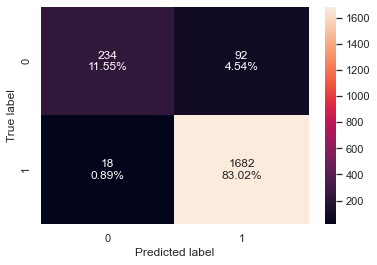

In [1207]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned, X_val, y_val)

<font color=darkorange>
<font size =4.5>
1.11.3  XGBoost model :RandomizedSearchCV

In [1208]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(100,200,100),
            'scale_pos_weight':[0,1,2,5],
            'learning_rate':[0.1,0.2,0.05],
            'subsample':[0.5,0.8,0.9,1],

           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.5, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.05} with CV score=0.994704920240913:
CPU times: user 3.94 s, sys: 1.21 s, total: 5.15 s
Wall time: 38min 4s


In [1209]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=5,
    subsample=0.5,
    learning_rate=0.05,
    eval_metric="logloss",

)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [1210]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.972675  0.999608   0.968827  0.983977

In [1211]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.952122  0.996471    0.94902  0.972166

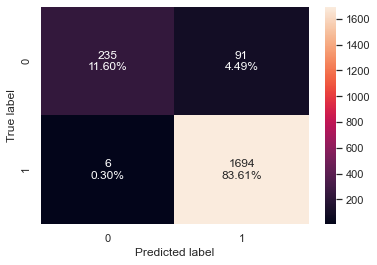

In [1212]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

<font color=darkorange>
<font size =4.5>
1.11.3  Adaboost model :RandomizedSearchCV

In [1213]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(50, 200, 50),
    "learning_rate": [0.1, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9933331409109277:
CPU times: user 1.1 s, sys: 334 ms, total: 1.43 s
Wall time: 4min 30s


In [1214]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.05,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.05, random_state=1)

In [1215]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.880494  0.993724   0.879535  0.933149

In [1216]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.878578  0.995294   0.876684  0.932231

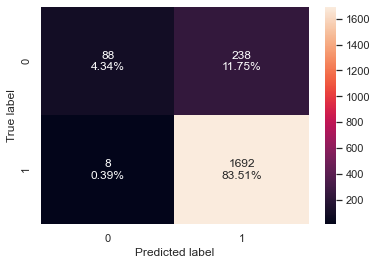

In [1217]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

<font color=darkorange>
<font size =4.5>
1.11.4  Comparing hypertuned models using Random Search CV 

In [1218]:
# training and validation performance comparison

models_comp_df = pd.concat(
    [

               GBM_random_train.T,
               GBM_random_val.T,

               xgboost_random_train.T,
               xgboost_random_val.T,

               Adaboost_random_train.T,
               Adaboost_random_val.T,

    ],
    axis=1,
)
models_comp_df.columns = [
    "Tuned Gradient Boost Model_train",
    "Tuned Gradient Boost Model_validation",
    "Tuned XGBoost Model_train",
    "Tuned XGBoost Model_validation",
    "Tuned Adaboost Model_train",
    "Tuned Adaboost Model_validation",
]
print("Performance comparison for hyperparameter tuned models:")
models_comp_df

Performance comparison for hyperparameter tuned models:


Tuned Gradient Boost Model_train  \
Accuracy                           0.959177   
Recall                             0.989802   
Precision                          0.962617   
F1                                 0.976020   

           Tuned Gradient Boost Model_validation  Tuned XGBoost Model_train  \
Accuracy                                0.945706                   0.972675   
Recall                                  0.989412                   0.999608   
Precision                               0.948140                   0.968827   
F1                                      0.968336                   0.983977   

           Tuned XGBoost Model_validation  Tuned Adaboost Model_train  \
Accuracy                         0.952122                    0.880494   
Recall                           0.996471                    0.993724   
Precision                        0.949020                    0.879535   
F1                               0.972166                    0.933149   

           Tuned Adaboost Model_validation  
Accuracy                          0.878578  
Recall                            0.995294  
Precision                         0.876684  
F1                                0.932231

<font color=darkcyan>
<font size =5>
1.12 Model Building - Oversampling train data using SMOTE

In [1219]:
print("Before UpSampling, counts of label 'Existing Customer': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Existing Customer': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'Attrited Customer': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Existing Customer': 5099
Before UpSampling, counts of label 'Attrited Customer': 976 

After UpSampling, counts of label 'Existing Customer': 5099
After UpSampling, counts of label 'Attrited Customer': 5099 

After UpSampling, the shape of train_X: (10198, 30)
After UpSampling, the shape of train_y: (10198,) 



<font color=darkorange>
<font size =4.5>

1.12.1 GBM with Oversampled train data

In [1220]:
# Creating new pipeline with best parameters
GBM_tuned_upsample = GradientBoostingClassifier(
  random_state=1, subsample= 1, n_estimators = 50, max_features = 0.8, min_samples_leaf =12,max_depth =3
    
)

# Fit the model on training data
GBM_tuned_upsample.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.8, min_samples_leaf=12,
                           n_estimators=50, random_state=1, subsample=1)

In [1221]:
# Calculating different metrics on train set
GBM_random_train_upsample = model_performance_classification_sklearn(
    GBM_tuned_upsample, X_train_over, y_train_over
)
print("Training performance:")
GBM_random_train_upsample

Training performance:


Accuracy    Recall  Precision        F1
0   0.96362  0.956266   0.970541  0.963351

In [1222]:
# Calculating different metrics on validation set
GBM_random_val_upsample = model_performance_classification_sklearn(GBM_tuned_upsample, X_val, y_val)
print("Validation performance:")
GBM_random_val_upsample

Validation performance:


Accuracy    Recall  Precision        F1
0  0.944719  0.955882   0.977738  0.966686

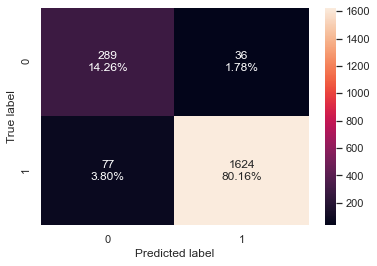

In [1223]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned_upsample, X_test, y_test)

<font color=darkorange>
<font size =4.5>

1.12.2 XGBoost with oversampled train data

In [1224]:
# building model with best parameters
xgb_tuned_upsample = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=5,
    subsample=0.5,
    learning_rate=0.05,
    eval_metric="logloss",
)
# Fit the model on training data
xgb_tuned_upsample.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [1225]:
# Calculating different metrics on train set
xgboost_random_train_upsample = model_performance_classification_sklearn(
    xgb_tuned_upsample, X_train_over, y_train_over
)
print("Training performance:")
xgboost_random_train_upsample

Training performance:


Accuracy    Recall  Precision        F1
0  0.982742  0.997843   0.968589  0.982998

In [1226]:
# Calculating different metrics on validation set
xgboost_random_val_upsample = model_performance_classification_sklearn(xgb_tuned_upsample, X_val, y_val)
print("Validation performance:")
xgboost_random_val_upsample

Validation performance:


Accuracy    Recall  Precision       F1
0  0.966436  0.990588   0.970046  0.98021

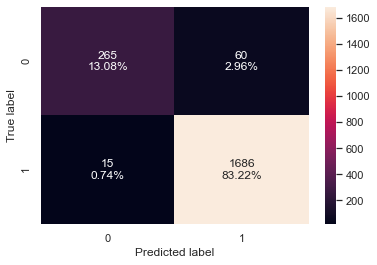

In [1227]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_upsample, X_test, y_test)

<font color=darkorange>
<font size =4.5>

1.12.3 Adaboost with oversampled train data

In [1228]:
# building model with best parameters
adb_tuned_upsample = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.05,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
adb_tuned_upsample.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.05, random_state=1)

In [1229]:
# Calculating different metrics on train set
Adaboost_random_train_upsample = model_performance_classification_sklearn(
    adb_tuned_upsample, X_train_over, y_train_over
)
print("Training performance:")
Adaboost_random_train_upsample

Training performance:


Accuracy    Recall  Precision        F1
0  0.846244  0.826044   0.860822  0.843074

In [1230]:
# Calculating different metrics on validation set
Adaboost_random_val_upsample = model_performance_classification_sklearn(adb_tuned_upsample, X_val, y_val)
print("Validation performance:")
Adaboost_random_val_upsample

Validation performance:


Accuracy  Recall  Precision        F1
0  0.813425    0.82   0.950887  0.880606

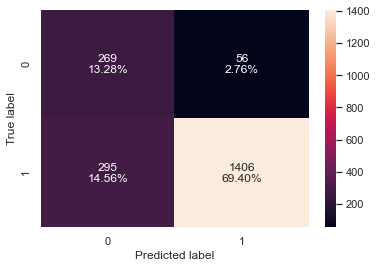

In [1231]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned_upsample, X_test, y_test)

<font color=darkorange>
<font size =4.5>
1.12.4  Comparing oversampled data models

In [1232]:
# training performance comparison

models_comp_df1 = pd.concat(
    [

               GBM_random_train_upsample.T,
               GBM_random_val_upsample.T,

               xgboost_random_train_upsample.T,
               xgboost_random_val_upsample.T,

               Adaboost_random_train_upsample.T,
               Adaboost_random_val_upsample.T,

    ],
    axis=1,
)
models_comp_df1.columns = [
    "Oversampled Gradient Boost Model_train",
    "Oversampled Gradient Boost Model_validation",
    "Oversampled XGBoost Model_train",
    "Oversampled XGBoost Model_validation",
    "Oversampled Adaboost Model_train",
    "Oversampled Adaboost Model_validation",
]
print("Performance comparison of tuned models for oversampled training data using SMOTE:")
models_comp_df1

Performance comparison of tuned models for oversampled training data using SMOTE:


Oversampled Gradient Boost Model_train  \
Accuracy                                 0.963620   
Recall                                   0.956266   
Precision                                0.970541   
F1                                       0.963351   

           Oversampled Gradient Boost Model_validation  \
Accuracy                                      0.944719   
Recall                                        0.955882   
Precision                                     0.977738   
F1                                            0.966686   

           Oversampled XGBoost Model_train  \
Accuracy                          0.982742   
Recall                            0.997843   
Precision                         0.968589   
F1                                0.982998   

           Oversampled XGBoost Model_validation  \
Accuracy                               0.966436   
Recall                                 0.990588   
Precision                              0.970046   
F1                                     0.980210   

           Oversampled Adaboost Model_train  \
Accuracy                           0.846244   
Recall                             0.826044   
Precision                          0.860822   
F1                                 0.843074   

           Oversampled Adaboost Model_validation  
Accuracy                                0.813425  
Recall                                  0.820000  
Precision                               0.950887  
F1                                      0.880606

<font color=darkcyan>
<font size =5>
1.13 Model Building - Undersampling train data using RandomUnderSampler

### Undersampling train data using RandomUnderSampler

In [1233]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [1234]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5099
Before Under Sampling, counts of label 'No': 976 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 30)
After Under Sampling, the shape of train_y: (1952,) 



<font color=darkorange>
<font size =4.5>

1.13.1 GBM with Undersampled train data

In [1235]:
# Creating new pipeline with best parameters
GBM_tuned_down = GradientBoostingClassifier(
  random_state=1, subsample= 1, n_estimators = 50, max_features = 0.8, min_samples_leaf =12,max_depth =3
)

# Fit the model on training data
GBM_tuned_down.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_features=0.8, min_samples_leaf=12,
                           n_estimators=50, random_state=1, subsample=1)

In [1236]:
# Calculating different metrics on train set
GBM_random_train_down = model_performance_classification_sklearn(
    GBM_tuned_down, X_train_un, y_train_un
)
print("Training performance:")
GBM_random_train_down

Training performance:


Accuracy    Recall  Precision        F1
0  0.958504  0.947746   0.968586  0.958053

In [1237]:
# Calculating different metrics on validation set
GBM_random_val_down = model_performance_classification_sklearn(GBM_tuned_down, X_val, y_val)
print("Validation performance:")
GBM_random_val_down

Validation performance:


Accuracy    Recall  Precision       F1
0  0.936328  0.941176   0.982198  0.96125

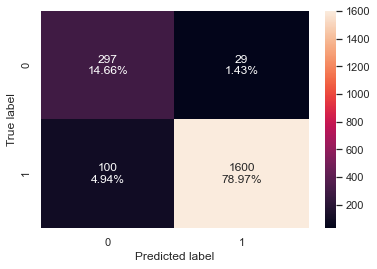

In [1238]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned_down, X_val, y_val)

<font color=darkorange>
<font size =4.5>

1.13.2 XGBoost with undersampled train data

In [1239]:
# building model with best parameters
xgb_tuned_down = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=5,
    subsample=0.5,
    learning_rate=0.05,
    eval_metric="logloss",
)
# Fit the model on training data
xgb_tuned_down.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [1240]:
# Calculating different metrics on train set
xgboost_random_train_down = model_performance_classification_sklearn(
    xgb_tuned_down, X_train_un, y_train_un
)
print("Training performance:")
xgboost_random_train_down

Training performance:


Accuracy    Recall  Precision        F1
0  0.978484  0.998975   0.959646  0.978916

In [1241]:
# Calculating different metrics on validation set
xgboost_random_val_down = model_performance_classification_sklearn(xgb_tuned_down, X_val, y_val)
print("Validation performance:")
xgboost_random_val_down

Validation performance:


Accuracy    Recall  Precision        F1
0  0.957058  0.974706   0.974133  0.974419

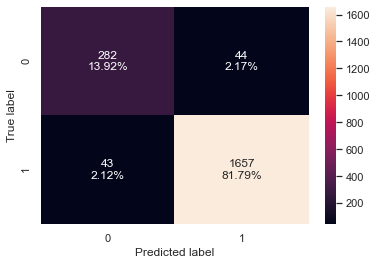

In [1242]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_down, X_val, y_val)

<font color=darkorange>
<font size =4.5>

1.13.3 Adaboost with undersampled train data

In [1243]:
# building model with best parameters
adb_tuned_down = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.05,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
adb_tuned_down.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.05, random_state=1)

In [1244]:
# Calculating different metrics on train set
Adaboost_random_train_down = model_performance_classification_sklearn(
    adb_tuned_down, X_train_un, y_train_un
)
print("Training performance:")
Adaboost_random_train_down

Training performance:


Accuracy   Recall  Precision        F1
0  0.847848  0.86373    0.83714  0.850227

In [1245]:
# Calculating different metrics on validation set
Adaboost_random_val_down = model_performance_classification_sklearn(adb_tuned_down, X_val, y_val)
print("Validation performance:")
Adaboost_random_val_down

Validation performance:


Accuracy    Recall  Precision        F1
0  0.853406  0.867647   0.953458  0.908531

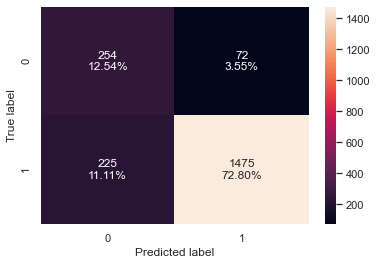

In [1246]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned_down, X_val, y_val)

<font color=darkorange>
<font size =4.5>
1.12.4  Comparing under sampled data models

In [1247]:
# training performance comparison

models_comp_df2 = pd.concat(
    [

               GBM_random_train_down.T,
               GBM_random_val_down.T,

               xgboost_random_train_down.T,
               xgboost_random_val_down.T,

               Adaboost_random_train_down.T,
               Adaboost_random_val_down.T,

    ],
    axis=1,
)
models_comp_df2.columns = [
    "Undersampled Gradient Boost Model_train",
    "Undersampled Gradient Boost Model_validation",
    "Undersampled XGBoost Model_train",
    "Undersampled XGBoost Model_validation",
    "Undersampled Adaboost Model_train",
    "Undersampled Adaboost Model_validation",
]
print("Performance comparison of tuned models for undersampled training data using RandomUnderSampler:")
models_comp_df2

Performance comparison of tuned models for undersampled training data using RandomUnderSampler:


Undersampled Gradient Boost Model_train  \
Accuracy                                  0.958504   
Recall                                    0.947746   
Precision                                 0.968586   
F1                                        0.958053   

           Undersampled Gradient Boost Model_validation  \
Accuracy                                       0.936328   
Recall                                         0.941176   
Precision                                      0.982198   
F1                                             0.961250   

           Undersampled XGBoost Model_train  \
Accuracy                           0.978484   
Recall                             0.998975   
Precision                          0.959646   
F1                                 0.978916   

           Undersampled XGBoost Model_validation  \
Accuracy                                0.957058   
Recall                                  0.974706   
Precision                               0.974133   
F1                                      0.974419   

           Undersampled Adaboost Model_train  \
Accuracy                            0.847848   
Recall                              0.863730   
Precision                           0.837140   
F1                                  0.850227   

           Undersampled Adaboost Model_validation  
Accuracy                                 0.853406  
Recall                                   0.867647  
Precision                                0.953458  
F1                                       0.908531

<font color=darkcyan>
<font size =5>
1.9 Model Performances - Compare

<font color=darkorange>
<font size =4.5>
1.10.1 Comparison for original, Oversampled and Under sampled on validation data

In [1248]:
#  Performance comparison for original, Oversampled and Under sampled on validation data


models_comp_df3 = pd.concat(
    [
               GBM_random_val.T,
               GBM_random_val_upsample.T,
               GBM_random_val_down.T,
        
               xgboost_random_val.T,
               xgboost_random_val_upsample.T,
               xgboost_random_val_down.T,
        
               Adaboost_random_val.T,
               Adaboost_random_val_down.T,
               Adaboost_random_val_down.T,

    ],
    axis=1,
)
models_comp_df3.columns = [
    "Original Gradient Boost Model",
    "Oversampled Gradient Boost Model",
    "Undersampled Gradient Boost Model",
    "Original XGBoost Boost Model",
    "Oversampled XGBoost Boost Model",
    "Undersampled XGBoost Boost Model",
    "Original Adaboost Boost Model",
    "Oversampled Adaboost Boost Model",
    "Undersampled Adaboost Boost Model",
]
print("Performance comparison of models for Original, Oversampled & Undersampled on validation data set:")
models_comp_df3.T

Performance comparison of models for Original, Oversampled & Undersampled on validation data set:


Accuracy    Recall  Precision        F1
Original Gradient Boost Model      0.945706  0.989412   0.948140  0.968336
Oversampled Gradient Boost Model   0.944719  0.955882   0.977738  0.966686
Undersampled Gradient Boost Model  0.936328  0.941176   0.982198  0.961250
Original XGBoost Boost Model       0.952122  0.996471   0.949020  0.972166
Oversampled XGBoost Boost Model    0.966436  0.990588   0.970046  0.980210
Undersampled XGBoost Boost Model   0.957058  0.974706   0.974133  0.974419
Original Adaboost Boost Model      0.878578  0.995294   0.876684  0.932231
Oversampled Adaboost Boost Model   0.853406  0.867647   0.953458  0.908531
Undersampled Adaboost Boost Model  0.853406  0.867647   0.953458  0.908531

<font color=darkorange>
<font size =4.5>
1.10.1 Comparison for original, Oversampled and Under sampled on test data

<font color=darkorange>
<font size =4.5>
1.10.1.1 Gradient Boosting Model : Test data score - Original, Oversampled and UnderSampled

In [1249]:
# Calculating different metrics on test set : Original
GBM_random_test = model_performance_classification_sklearn(GBM_tuned, X_test, y_test)
print("GBM Test performance for original data:")
GBM_random_test

GBM Test performance for original data:


Accuracy    Recall  Precision        F1
0  0.952616  0.990006    0.95519  0.972286

In [1250]:
# Calculating different metrics on test set : Oversampled 
GBM_random_test_upsample = model_performance_classification_sklearn(GBM_tuned_upsample, X_test, y_test)
print("GBM Test performance for oversampled data:")
GBM_random_test_upsample

GBM Test performance for oversampled data:


Accuracy    Recall  Precision        F1
0  0.944225  0.954733   0.978313  0.966379

<font color=green>
<font size =1>
# Observations : Recall is pretty good for both Oversampled XGBoost and Undersampled XGboost ,i.e. 0.99 and 0.97 respectively. Above our expected recall of over 0.95. Uptill now this is the best model to productionize

In [1251]:
# Calculating different metrics on test set : Undersampled 
GBM_random_test_down = model_performance_classification_sklearn(GBM_tuned_down, X_test, y_test)
print("GBM Test performance for undersampled data:")
GBM_random_test_down

GBM Test performance for undersampled data:


Accuracy    Recall  Precision        F1
0  0.930898  0.931805   0.985084  0.957704

<font color=darkorange>
<font size =4.5>
1.10.1.1 XGBoost Model : Test data score - Original, Oversampled and UnderSampled

In [1252]:
# Calculating different metrics on test set : Original 
xgboost_random_test = model_performance_classification_sklearn(xgb_tuned2, X_test, y_test)
print(" XGB Test performance for original data:")
xgboost_random_test

 XGB Test performance for original data:


Accuracy    Recall  Precision        F1
0  0.951629  0.995885    0.94902  0.971888

In [1253]:
# Calculating different metrics on test set : Oversampled 
xgboost_random_test_upsample = model_performance_classification_sklearn(xgb_tuned_upsample, X_test, y_test)
print(" XGB Test performance for oversampled data:")
xgboost_random_test_upsample

 XGB Test performance for oversampled data:


Accuracy    Recall  Precision        F1
0  0.962981  0.991182   0.965636  0.978242

In [1254]:
# Calculating different metrics on test set : Undersampled 
xgboost_random_test_down = model_performance_classification_sklearn(xgb_tuned_down, X_test, y_test)
print(" XGB Test performance for undersampled data:")
xgboost_random_test_down

 XGB Test performance for undersampled data:


Accuracy    Recall  Precision        F1
0  0.955577  0.972369   0.974661  0.973514

<font color=green>
<font size =1>
# Observations : Recall is pretty good for both Oversampled XGBoost and Undersampled XGboost ,i.e. 0.99 and 0.97 respectively. Above our expected recall of over 0.95. Uptill now this is the best model to productionize

<font color=darkorange>
<font size =4.5>
1.10.1.1 AdaBoost Model : Test data score - Original, Oversampled and UnderSampled

In [1255]:
# Calculating different metrics on test set : Original 
Adaboost_random_test = model_performance_classification_sklearn(adb_tuned2, X_test, y_test)
print("ADB Test performance for original data:")
Adaboost_random_test

ADB Test performance for original data:


Accuracy    Recall  Precision        F1
0  0.879566  0.995885   0.877266  0.932819

In [1256]:
# Calculating different metrics on test set : Oversampled 
Adaboost_random_test_upsample = model_performance_classification_sklearn(adb_tuned_upsample, X_test, y_test)
print("ADB Test performance for oversampled data:")
Adaboost_random_test_upsample

ADB Test performance for oversampled data:


Accuracy    Recall  Precision        F1
0  0.826752  0.826573   0.961696  0.889029

In [1257]:
# Calculating different metrics on test set : Undersampled 
Adaboost_random_test_down = model_performance_classification_sklearn(adb_tuned_down, X_test, y_test)
print("ADB Test performance for undersampled data:")
Adaboost_random_test_down

ADB Test performance for undersampled data:


Accuracy    Recall  Precision        F1
0  0.852419  0.860082   0.959974  0.907287

<font color=green>
<font size =1>
# Observations : Recall is low for both Oversampled Adaboost and Undersampled Adaboost ,i.e. 0.82 and 0.86 respectively. Expected recall is over 0.95. Recall for original Adaboost is almost 1 . Hence looks like overfitting. Therefore we wont be considering Adaboost as our final model for productionizing.

<font color=darkorange>
<font size =4.5>
1.10.1 Comparison for original, Oversampled and Under sampled on test data

In [1258]:
#  Performance comparison for original, Oversampled and Under sampled on validation data


models_comp_df3 = pd.concat(
    [
               GBM_random_test.T,
               GBM_random_test_upsample.T,
               GBM_random_test_down.T,
        
               xgboost_random_test.T,
               xgboost_random_test_upsample.T,
               xgboost_random_test_down.T,
        
               Adaboost_random_test.T,
               Adaboost_random_test_down.T,
               Adaboost_random_test_down.T,

    ],
    axis=1,
)
models_comp_df3.columns = [
    "Original Gradient Boost Model",
    "Oversampled Gradient Boost Model",
    "Undersampled Gradient Boost Model",
    "Original XGBoost Boost Model",
    "Oversampled XGBoost Boost Model",
    "Undersampled XGBoost Boost Model",
    "Original Adaboost Boost Model",
    "Oversampled Adaboost Boost Model",
    "Undersampled Adaboost Boost Model",
]
print("Performance comparison of models for Original, Oversampled & Undersampled on test data set:")
models_comp_df3.T

Performance comparison of models for Original, Oversampled & Undersampled on test data set:


Accuracy    Recall  Precision        F1
Original Gradient Boost Model      0.952616  0.990006   0.955190  0.972286
Oversampled Gradient Boost Model   0.944225  0.954733   0.978313  0.966379
Undersampled Gradient Boost Model  0.930898  0.931805   0.985084  0.957704
Original XGBoost Boost Model       0.951629  0.995885   0.949020  0.971888
Oversampled XGBoost Boost Model    0.962981  0.991182   0.965636  0.978242
Undersampled XGBoost Boost Model   0.955577  0.972369   0.974661  0.973514
Original Adaboost Boost Model      0.879566  0.995885   0.877266  0.932819
Oversampled Adaboost Boost Model   0.852419  0.860082   0.959974  0.907287
Undersampled Adaboost Boost Model  0.852419  0.860082   0.959974  0.907287

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. On test data Gradient boost and XGboost both have a Recall of  >0.95, Precision >0.70, Accuracy >0.70.
2. Hence the best models to consider would be 
    1) Oversampled XGBoost Boost Model- `Acc : 0.962981`,`Recall: 0.991182`, `Precision: 0.965636` 	
    2) Oversampled Gradient Boost Model- `Acc : 0.944225`, `Recall: 0.954733`, `Precision: 0.978313`
3. After analyzing performamce of all the models on validation and test data we will be using `Oversampled XGBoost Boost Model` for productionizing. 


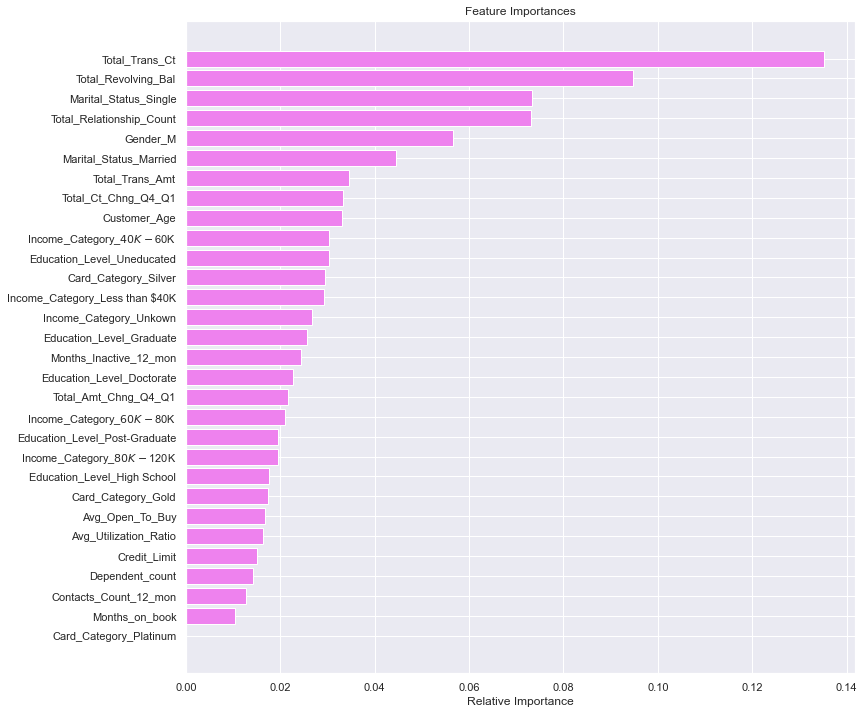

In [1259]:
feature_names = X_train.columns
importances = xgb_tuned_upsample.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. Total transaction count is the most important feature. Followed by total revolving balance.
2. As we can also see from EDA that reduction in transaction count increases the customer attriation rate.

<font color=darkcyan>
<font size =5>
1.15 Productionize the model

## Pipelines for productionizing the model

In [1260]:
# creating a list of categorical variables with missing values
categorical_features = ["Education_Level", "Marital_Status"]

# creating a transformer for categorical variables, which will first apply KNN imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", KNNImputer(n_neighbors=5)),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        
        ("cat", categorical_transformer, categorical_features),
    ],

)


In [1261]:
from imblearn.pipeline import Pipeline

In [1262]:
# Oversampling using SMOTE
smt = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

In [1263]:
# Separating target variable and other variables
X = churn_m.drop(["Attrition_Flag"], axis=1)
y = churn_m["Attrition_Flag"]

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [1264]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [1265]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
          ('smt', smt),
            (
              "XGB",
               XGBClassifier(
                  random_state=1,
                  n_estimators=100,
                  scale_pos_weight=5,
                  subsample=0.5,
                  learning_rate=0.05,
                  eval_metric="logloss",
               ),
        
            ),
          ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education_Level',
                                                   'Marital_Status'])])),
                ('smt', SMOTE(random_state=1, sampling_strategy=1)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_by...
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.0

<font color=darkcyan>
<font size =5>
Conclusion

### <a id='link1'> Summary of EDA</a>

<font color = 'black'>
Key Observations
    
    
1) Customer_Age : Customer Age varies from 26 to 73 years, with maximum customers in age group of 40-50 years.
    
2) Gender : Most customers are female. 52% of customers are female, where as only 47 % are male.
    
3) Dependent_count : Dependent count varies from 0 to 5. Most customers have 2 or 3 dependents.More than 50 % of customers have 2 or 3 dependents.
    
4) Education_Level : Education level has 6 unique values namely, Graduate, High School, Uneducated, College, Post-Graduate, Doctorate. And some missing values that can be categorized as unkown for now. Most customers have a education level of Graduate or a high school. Almost 50 % of customers fall in the graduate and high school category.
    
5) Marital_Status : Marital Status has 3 unique values Married, Single, Divorced. Max customers are married. Most customers are married and single, only 7 % customer data on divorced customers.
    
6) Income_Category : Income level of customers is categorized as Less than $40K, $40K - $60K , $60K - $80K, $80K - $120K, $120K+. There is odd category called 'abc' , assumming it as unkown or not specified by customer. 35 % of customers fall in the less than $40k category. 11% of customers have not disclosed their income
    
7) Card_Category : Most customers card category is Blue. Card categories are Blue, Silver, Gold, Platinum. But 'Blue' seems to be the most popular of categories with most customers having Blue card. More than 90% of customers have blue card category
    
8) Months_on_book : Period of customer relation ship with bank varies from 13 to 56 months. most customers are with bank for 36 months, i.e. 3 years.
    
9) Total_Relationship_Count : Total number of products held by customer varies from 1 to 6. Most customers have 3 products. More than 75% of customers have more than 3 products.
    
10) Months_Inactive_12_mon : Number of months inactive in last 12 months for most customers its between 1-3 months. More than 80% of customers are inactive for 3 or less months only.
    
11) Contacts_Count_12_mon : Number of contacts between customer and bank varies from 0 to 6 times. Mostly its 2 or 3 times. Almost 60 % of customers have atleast 2-3 contacts in the last 12 months with the bank.
    
12) Credit_Limit : Credit Limit on card too varied and varies from 1438 to 34516. Max customers have a credit limit of 0-5000. Followed by a high credit limit 35000.
    
13) Total_Revolving_Bal : Max customers have Total_Revolving_Bal as zero, followed by 2500. That is most customers pay of their bills every month.
    
14) Avg_Open_To_Buy : 
    
15) Total_Trans_Amt : Maximum Total_Trans_Amt is betweeb 3000 to 5000
    
16) Total_Trans_Ct : Total transaction count is from 0 to 139 times.
    
17) Total_Ct_Chng_Q4_Q1 : Mostly Total_Ct_Chng_Q4_Q1 is between 0.5 to 1
    
18) Total_Amt_Chng_Q4_Q1 : Maximum Total_Amt_Chng_Q4_Q1 is between 0.5 to 1
    
19) Avg_Utilization_Ratio : Average Utilization varies from 0 to 0.99. For maximum customers Avg_Utilization_Ratio is zero.


Key Variables correlating 
    
    
1) In diagonal distribution plot there is no strong distinction between Attrited and Existing customers.
2) Customer Age and Months_on_book show a strong correlation
3) Avg_Open_To_Buy and Credit_Limit are strongly correlatated. When columns are so strongly correlated we can choose to combine them and form a composite.
4) Avg_Open_To_Buy and Credit_Limit reduces as Avg_Utilization_Ratio increases.
5) Mostly all customers with hihger values of Total_Trans_Amtand Total_Trans_Ct are existing customers.
6) Total_Revolving_Bal and Avg_Utilization_Ratio higher the values more existing customers.
7) There is a considerable correlation between months on book and customer age.
8) Very high correlation between Total_Trans_Amt and Total_Trans_Ct
9) Avg_Utilization_Ratio and Total_Revolving_Bal also have a high correlation.
10) Avg_Utilization_Ratio and Credit_Limit have a high negative correlation.
11) Avg_Utilization_Ratio and Avg_Open_To_Buy also have a high negative correlation.
    
    
    
Analysis of customer attrition
    
1) Attrited customers have less products as compared to existing customers. So more the products a customer has , more the chance that the bank doesnot lose the customer.
2)Attrited customers have higher count of inactive period in last 12 months.
3) Attrited customers also of have higher contact counts with the bank.
4) Existing customers have higher Total_Revolving_Bal than attrited customers.
5) Customer_Age, Dependent_count and Months_on_book are slightly less for existing customers as compared to atrrited customers.
6) Avg_Open_To_Buy has no significant impact on customer attrition.
7) Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio are significantly less for atrrited customers as compared to existing customers.
8) Customer attrition is slightly higher in female than in male.
9) Customers with higher education level, i.e. Post Graduate and Doctrate have higher customer attrition 
10) Single and Divorced customers have slightly higher atrrition rate as compared to married customers.
11) Less than 40k, 120k + and unknown income category of customers have highest attriation rate. i.e. Customers likely to attriate are most liklely not to specify their income .
12) Platinum card customers have highest attriation rate , most probably due to high annual rates. Silver card customers are least likely to churn.
13) Customers with higher dependent count are more likely to churn, probably to avail new card welcome benefits.
14) Customers with less product count are more likely to churn as compared to customers with more than 2 products.
15) Customer attriation is highest when there is zero activity on the card in the last 12 months. So bank should contact customers with long inactive period to solve their issues and retain the customer base.
16) Customers with 6 contacts in last 12 months have always churned. Higher the number of contacts , higher is the churn rate.
17) Lower transaction amount has the highest attriation.
18) At higher transaction amount i.e. above 10000 there is hardly any attriation. Suggesting customer is using the credit card and is satisfied with the product.
19) If transaction count is less than 20 churn is high. If transaction count is more than 80 churn is very low almost nil. Most customers have a transaction count of 20-80. Churn is highest in range 20-40.
20) Attrited customers are highest when total transaction count has reduced from Q4 to Q1.
21) Attrited customers are highest when total transaction amount has reduced from Q4 to Q1.
22) Attrited customers rate is highest when Avg_Utilization_Ratio is less than 0.2.
23) Customer attriation has higher probability at zero total revolving balance.
24) Customer attriation has higher probability at lower total transaction count.
25) Most customers with less than 5k amount left on card to use are more likely to churn. Higher the amount left on card less likely are the customers to churn.
26) Attrited customers are maximum in the age group of 40-50

Analysis for Card Category

1) Customers with high dependent cout prefer Gold and Platinum card mostly.
2) Higher age customers prefer more Platinum card
3) Card category does not affect months on book significantly. Customer realtion ship with the bank has no impact by type of card.
4) Customers with blue card have more products from the bank, customers with gold or platinum have lesser products with bank.
5) Card category has no significant impact on Months_Inactive_12_mon or Contacts_Count_12_mon.
6) Platinum card has the highest credit limit and Avg_Open_To_Buy, blue card has the lowest credit limit and Avg_Open_To_Buy.
7) Total revolving balance for gold and platinum card is higher as compared to blue and silver card.
8) Total_Amt_Chng_Q4_Q1 is slightly higher for platinum as compared to blue.
9) Total_Trans_Amt and Total_Trans_Ct are highest for platinum and lowest for blue.
10) Total_Ct_Chng_Q4_Q1 is lowest for platinum.
11) Avg_Utilization_Ratio significantly high as compared to any other card.

### <a id='link1'>Insights and Recommendations to Business</a>

<font color = 'black'>

1) Most customers have a relationship period of 3 years with bank i.e. 36 months. Reasons may be varied, but assuming they have card expiration date of 3 years, customers are not renewing their cards after the initial period. To retain customers bank can provide new renewal offers or benefits to encourage customers. Auto renewal of card might also be helpful in retaining customers.
    
2) Another reason might be that the bank is offering some zero percent interest benefits in the initial 3 years, if that is the case, to retain customers bank can offer new cards or new benefits.

3) According to our model, Total transaction count is the most important feature. We have seen a reduction in transaction count for customers who churn. The reasons for reduced transaction count might be that either the customer has maxed out their card or they are not utilizing their card.

4) Bank should contact customers who are maxing out their card limit and provide offers to improve their credit limit. Like increasing the credit limit on same card or provide another product with more privalages suitable for customer spending categories according to their spend analysis on grocery, fuel , travel and others.
    
5) Customers with Zero revolving balance also have higher churn rate , suggesting that their cards are not being utilized. Banks can reach out to these customers for providing them alternate cards with more perks as per their requirement.

6) For targeting new customers bank can improve marketing by targeting customers who are more likely to take a caredit card. According to our data most existing customers, are Female, have a graduate degree, are married and earning less than $40k. this can be our target group for new customers.

7) Also blue card category is the most popular one. But further data analysis can be done to find target customers for other cards, thereby improving business. According to our data, Customers with high dependent cout prefer Gold and Platinum card mostly. Higher age customers prefer more Platinum card
  